In [ ]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
import uncertainties
from scipy import optimize
from scipy.optimize import curve_fit
from uncertainties import ufloat as uf
from uncertainties.umath import *
from uncertainties import unumpy as un
from uncertainties.unumpy import nominal_values as n
from uncertainties.unumpy import std_devs as s
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel
from lmfit import Model



####################################################################################################################
#Warnings disabled
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')
#####################################################################################################################
def E_kal(x,m,b):
    return m*x+b

def Effizienz(x,P1,P2,P3,P4,P5):
    return (P1+P2*np.log(x)+P4*np.log(x)**3+P5*np.log(x)**4+P3*np.log(x)**2)/x

def Gausfit_1(winkel,x,y,namena,amplitude,center,sigma,dont_show):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    # print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    figure=plt.figure(figsize=(10,6))
    plt.title('Gaußkurvenfit an das korrigierte Cs-Streuspektrum bei '+str(winkel)+'$^{\circ}$',fontsize=15)
    plt.plot(x1,y1,"b-",linewidth=.2,label="Messwerte",)
    plt.plot(x1,result.best_fit,"r-",label="Gaußkurve",)
    plt.xlabel('Energie [keV]',fontsize=12)
    plt.ylabel('Zählrate',fontsize=12)
    plt.grid()
    plt.legend(fontsize=12)
    plt.savefig(namena+'.png')
    if (dont_show==1):
        plt.close(figure)
    #plt.show
    return lolo1,lala1

def Gausfit_11(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    #print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Gausfit_2(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_') +
             GaussianModel(prefix='g2_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma,
                            g2_amplitude=amplitude,
                            g2_center=center,
                            g2_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Gradenfit(x,y):
    anpassungs_werte, co_var = curve_fit(E_kal,x,y)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(E_kal(E, *anpassungs_werte))
    return Rfit

def Gradenfiter(x,y,dy):
    anpassungs_werte, co_var = curve_fit(E_kal,x,y,sigma=dy,absolute_sigma=True,nan_policy='omit')
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(E_kal(E, *anpassungs_werte))
    return Rfit

def Fit(x,y,s,funktion,d_y):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,sigma=d_y,absolute_sigma=True,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit2(x,y,s,funktion):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit_smooth(x,y,x_smooth,s,funktion,d_y):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,sigma=d_y,absolute_sigma=True,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x_smooth:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit_smooth2(x,y,x_smooth,s,funktion):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x_smooth:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def coarseBackgroundModel(x_,y_,deg):
    poly_mod = PolynomialModel(deg, prefix='p1_')
    p_bg = poly_mod.guess(y_, x=x_)
    mod_bg = poly_mod
    init_bg = mod_bg.eval(p_bg, x=x_)
    out_bg = mod_bg.fit(y_, p_bg, x=x_)
    return p_bg, out_bg, mod_bg
#Die beiden Funktionen getSignal und detailedSignalFit sind leichte Abänderungen von Teilen eines Skriptes zur Auswertung von Radioteleskop-Spektren, das uns im Rahmen 
#eines Praktikum 4 Versuches gegeben wurde
def getSignal(x,y,width_guess,NPeaks,smoothing,signal_range,minmaxvar=50,signal_thr = None):
    s_mask = (x>signal_range[0])&(x<signal_range[1])
    x_s = x[s_mask]
    signal_use = (y)[s_mask]

    if (smoothing == 1):
        b,a = scs.butter(3,0.07)
        zi = scs.lfilter_zi(b, a)
        z, _ = scs.lfilter(b, a, x_s, zi=zi*signal_use[0])
        z2, _ = scs.lfilter(b, a, z, zi=zi*z[0])
        signal_smooth = scs.filtfilt(b, a, signal_use)
    
    else:
       signal_smooth = signal_use

    amp = (np.max(signal_smooth)-np.min(signal_smooth))
    minimum = np.min(signal_smooth)
    
    s_min = signal_range[0]+minmaxvar
    s_max = signal_range[1]-minmaxvar  #10
    
    s_mask_narrow = ((x_s>s_min)&(x_s<s_max))
    
    if signal_thr is None:
        peaks = scs.find_peaks(signal_smooth[s_mask_narrow], width=width_guess)
        prom = peaks[1]['prominences']
    else:
        peaks = scs.find_peaks(signal_smooth[s_mask_narrow], height = minimum + signal_thr*amp, width=width_guess)
        prom = peaks[1]['peak_heights']
    prom_save = prom.copy()
    prom.sort()
    
    # only use the most prominent peaks for our first guess of the Gauss peak centers:
    if NPeaks > len(prom): # if not enough peaks are found, reduce NPeaks!
        NPeaks = len(prom)
        print("reduced NPeaks to "+str(NPeaks))
    peaks_use = peaks[0][prom_save>=prom[-NPeaks]] 
    peak_width = peaks[1]['widths'][prom_save>=prom[-NPeaks]]
    # save the peak positions for later
    gauss_centers = x_s[s_mask_narrow][peaks_use]
    peak_y = signal_use[s_mask_narrow][peaks_use]
    return x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth

def detailedSignalFit(x_s, signal_use,add_gaussians, gauss_centers, peak_width, center_variation,sigma_min,sigma_max,amp_min,amp_value_guess,y_err=[],poly_deg = 3,edges=50,s_range=[]):
    mask_edges = np.logical_or(x_s<s_range[0]+edges, x_s>s_range[1]-edges)  #20
    if not (poly_deg is None):
        poly1 = PolynomialModel(degree=poly_deg, prefix='p1_')
        p_s = poly1.guess(signal_use[mask_edges],x=x_s[mask_edges])

    # set up the first Gauss peak
    gaussX = GaussianModel(prefix='g'+str(0)+'_')
    gaussians = gaussX
    p_gauss = gaussX.make_params()
    if (poly_deg is None): p_s = p_gauss 
    p_gauss['g'+str(0)+'_center'].set(value=gauss_centers[0], min=gauss_centers[0]-center_variation, max=gauss_centers[0]+center_variation) # center
    p_gauss['g'+str(0)+'_sigma'].set(value=peak_width[0], min=sigma_min, max=sigma_max) # width of peak
    p_gauss['g'+str(0)+'_amplitude'].set(value=amp_value_guess, min=amp_min) # amplitude of peak

    # now set up the rest of the Gauss peaks:
    for i in np.arange(1,len(gauss_centers)):
        gaussX = GaussianModel(prefix='g'+str(i)+'_')
        gaussians = gaussians + gaussX
        p_gauss.update(gaussX.make_params())
        p_gauss['g'+str(i)+'_center'].set(value=gauss_centers[i], min=gauss_centers[i]-center_variation, max=gauss_centers[i]+center_variation)
        p_gauss['g'+str(i)+'_sigma'].set(value=peak_width[i], min=sigma_min, max=sigma_max)
        p_gauss['g'+str(i)+'_amplitude'].set(value=amp_value_guess, min=amp_min)
    
    # add some extra gauss peaks with free parameters to patch up anything left
    for i in np.arange(len(gauss_centers),len(gauss_centers)+add_gaussians):
        gaussX = GaussianModel(prefix='g'+str(i)+'_')
        gaussians = gaussians + gaussX
        p_gauss.update(gaussX.make_params()) 
        p_gauss['g'+str(i)+'_center'].set(min=np.min(x_s)+50, max=np.max(x_s)-50)
        p_gauss['g'+str(i)+'_sigma'].set(min=sigma_min, max=sigma_max)
        p_gauss['g'+str(i)+'_amplitude'].set(min=amp_min)
    
    # assemble the model:  polynomial background + Gauss peaks
    if not (poly_deg is None): mod_s = poly1 + gaussians
    else: mod_s = gaussians
    # include parameters for the Gauss peaks in the parameter list
    p_s.update(p_gauss)
    # initialize model with the parameters
    init_s = mod_s.eval(p_s, x=x_s)
    # fit model
    if (len(y_err)>0):
        out_s = mod_s.fit(signal_use, p_s, x=x_s,weights=1.0/y_err,nan_policy='omit')
    else:
        out_s = mod_s.fit(signal_use, p_s, x=x_s)
    return p_s, out_s, mod_s, gaussians

def Fit_allinone(x,y,N,y_err=[],width=10,center_var=20,s_range=[],amp_guess=50,polydeg=None,ampmin=0,sigmamin=0,sigmamax=500,more_gaus=0,smoothe= 1,return_in_lists=None,one_list=None,signal_t=None,minmaxvar=50,edges=50):
    if not s_range:
        s_range=[x[0],x[len(x)-1]]
    s_mask = (x>s_range[0])&(x<s_range[1])
    if (len(y_err)>0):
        y_errs = y_err[s_mask]
    else:
        y_errs=[]
    x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,width,N, smoothe,s_range,signal_thr= signal_t,minmaxvar=minmaxvar)
    p_s, out_s, mod_s, mod_s_only = detailedSignalFit(x_s, signal_use,more_gaus, gauss_centers, peak_width,center_var,sigma_min=sigmamin,sigma_max=sigmamax,amp_min=ampmin,amp_value_guess=amp_guess,y_err=y_errs,poly_deg= polydeg,s_range=s_range,edges=edges)
    lolo1=[]
    lala1=[]
    names=[]
    i=0
    if not (polydeg is None):
        n=polydeg
    else:
        n=-1
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    i=0
    count=0
    params_list=[list() for x in range(int(len(lolo1)/5))]
    stderr_list=[list() for x in range(int(len(lolo1)/5))]
    centers=[]
    Amplitudes=[]
    centerser=[]
    Amplitudeser=[]
    for h in range(len(lolo1)):
        params_list[i].append(lolo1[h])
        stderr_list[i].append(lala1[h])
        count=count+1
        if (count==5):
            i=i+1
            count=0
    result=out_s.best_fit
    if (return_in_lists is None):
        return p_s,x_s,result,lolo1,lala1,out_s,mod_s,mod_s_only,names,gauss_centers,peak_y
    elif (one_list is None):
        return_other=[gauss_centers,peak_y,names,p_s,mod_s,mod_s_only]
        return_fit=[x_s,result]
        return_fit_results=[params_list,stderr_list,lolo1,lala1,out_s]
        return return_fit,return_fit_results,return_other
    elif not (one_list is None):
        return_list=[x_s,result,lolo1,lala1,out_s,gauss_centers,peak_y,p_s,mod_s,mod_s_only,names]
        return return_list

def Fit_allinone_wocent(x,y,gauss_centers,peak_width,center_var,s_range,amp_guess,y_err=[],polydeg=None,ampmin=0,sigmamin=0,sigmamax=500,more_gaus=0,smoothe= 1):
    #x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,width,N, smoothe,s_range,signal_thr= None)
    s_mask = (x>s_range[0])&(x<s_range[1])
    if (len(y_err)>0):
        y_errs = y_err[s_mask]
    else:
        y_errs=[]
    x_s = x[s_mask]
    y_s = (y)[s_mask]
    p_s, out_s, mod_s, mod_s_only = detailedSignalFit(x_s, y_s,more_gaus, gauss_centers, peak_width,center_var,sigma_min=sigmamin,sigma_max=sigmamax,amp_min=ampmin,amp_value_guess=amp_guess,y_err=y_errs,poly_deg= polydeg,s_range=s_range)
    lolo1=[]
    lala1=[]
    names=[]
    i=0
    if not (polydeg is None):
        n=polydeg
    else:
        n=-1
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    result=out_s.best_fit
    return p_s,x_s,result,lolo1,lala1,out_s,mod_s,mod_s_only,names,gauss_centers

def Plotter(X,Y,N_plots,errors=[],figsiz=(12,6),ucband=[],labels=[],colors=[],text=[],linewidths=[],styles=[],markersizes=[],xtitle='x',ytitle='y',title='A',name=None,xrange=None,yrange=None,close=None):
    for n in range(0,N_plots):
        labels.append('')
        colors.append('b')
        linewidths.append(0.5)
        styles.append('-')
        markersizes.append(1)
    figure=plt.figure(figsize=figsiz)
    plt.title(title)
    for i in range(0,N_plots):
        plt.plot(X[i],Y[i],styles[i],color=colors[i],linewidth=linewidths[i],label=labels[i],markersize=markersizes[i])
    if errors:
        plt.errorbar(errors[0],errors[1],errors[3],errors[2],'k.',capsize=1,elinewidth=1,markersize=0,label='')
    if not (len(ucband)==0):
        plt.fill_between(ucband[0][0], ucband[0][1]-ucband[0][2], ucband[0][1]+ucband[0][2], color="#4BB2B9",label=(str(ucband[1][0])+'-$\sigma$ uncertainty band'))
    plt.xlabel(xtitle,fontsize=12)
    plt.ylabel(ytitle,fontsize=12)
    if text:
        for i in range(len(text[0])):
            plt.text( text[1][i],text[2][i], str(np.round(text[0][i],0)), fontsize = 8)
    if xrange:
        plt.xlim(xrange)
    if not (yrange is None):
        plt.ylim(yrange)
    plt.grid()
    plt.legend()
    if not (name is None):
        plt.savefig(name+'.png')
    if not (close is None):
        plt.close(figure)
    plt.show
    return 0

def ripfromlist(mylist,riplist):
    rippedlist=[]
    for i in range(len(mylist)):
        if i not in riplist:
            rippedlist.append(mylist[i])
    return rippedlist

def jackderripper(mylist,riplist):
    rippedlist=[]
    for i in range(len(mylist)):
        if i in riplist:
            rippedlist.append(mylist[i])
    return rippedlist

def ga(arr):
    return np.array([x for x in arr])

def handle0er(uarray):
    mini=min(i for i in s(uarray) if i > 0)
    for i in range(len(s(uarray))):
        if s(uarray[i])==0:
            uarray[i]=uf(n(uarray[i]),mini)
    return uarray
def filetoxy(name):
    data=np.loadtxt(name)
    x=data[:,0]
    y=data[:,1]
    y_err=np.zeros(shape=(len(y)))
    y_err=np.sqrt(y)
    y2=un.uarray(y,y_err)
    return x,y,y2
#signal_range=[0,4500]
path1='../data/'
xEu,yEu,yEuer=filetoxy(path1+'Eu-Ge-10.txt')
xCo,yCo,yCoer=filetoxy(path1+'Co-Ge.txt')
xCs,yCs,yCser=filetoxy(path1+'Cs-Ge.txt')
xBg,yBg,yBger=filetoxy(path1+'Hintergrund-Ge.txt')
xuBg,yuBg,yuBger=filetoxy(path1+'Untergrund-langzeit.txt')
xu,yu,yuer=filetoxy(path1+'Erde-Ge.txt')
masklast=((xEu<16300))# & (xEu>10))

# def Tab(names,data,dataer,filename,separat_runden=[]):
#     runden=separat_runden
#     with open(filename+'.txt', 'w') as f:
#         f.write('{l')
#         for h in range(0,len(names)-1):
#             f.write('|l')
#         f.write('}\n')
#         for h in range(0,len(names)):
#             if not (h==len(names)-1):
#                 f.write(names[h]+ '&')
#             else:
#                 f.write(names[h]+ '\\\\')
#             runden.append(3)
#         f.write('\n')
#         f.write('\hline')
#         f.write('\n')
#         count=0
#         for i in range(0,len(data)):
#             if (np.sign(np.log10(dataer[i]))*int(np.abs(np.log10(dataer[i]))) <=0):
#                 f.write(str(np.round(data[i],runden[count]+int(np.abs(np.log10(dataer[i])))))+ '\pm'+str(np.round(dataer[i],runden[count]+int(np.abs(np.log10(dataer[i]))))))
#             else:
#                 f.write(str(np.round(data[i],runden[count]-int(np.abs(np.log10(dataer[i])))))+ '\pm'+str(np.round(dataer[i],runden[count]-int(np.abs(np.log10(dataer[i]))))))
#             if not (count==(len(names)-1)):
#                 f.write('&')
#             else:
#                 f.write('\\\\')
#                 f.write('\n')
#                 count=-1
#             count=count+1
#         f.close
#     return 0

# def Tab2(names,data,dataer,filename,separat_runden=[]):
#     runden=separat_runden
#     with open(filename+'.txt', 'w') as f:
#         f.write('{l')
#         for h in range(0,len(names)-1):
#             f.write('|l')
#         f.write('}\n')
#         for h in range(0,len(names)):
#             if not (h==len(names)-1):
#                 f.write(names[h]+ '&')
#             else:
#                 f.write(names[h]+ '\\\\')
#             runden.append(3)
#         f.write('\n')
#         f.write('\hline')
#         f.write('\n')
#         for i in range(0,len(data[0])):
#             count=0
#             for h in range(len(names)):
#                 if (len(dataer[h])==0):
#                     if (np.sign(np.log10(data[h][i]))*int(np.abs(np.log10(data[h][i]))) <=0):
#                         f.write(str(np.round(data[h][i],runden[count]+int(np.abs(np.log10(data[h][i]))))))
#                 else:
#                     if (np.sign(np.log10(dataer[h][i]))*int(np.abs(np.log10(dataer[h][i]))) <=0):
#                         f.write(str(np.round(data[h][i],runden[count]+int(np.abs(np.log10(dataer[h][i])))))+ '\pm'+str(np.round(dataer[h][i],runden[count]+int(np.abs(np.log10(dataer[h][i]))))))
#                     else:
#                         f.write(str(np.round(data[h][i],runden[count]-int(np.abs(np.log10(dataer[h][i])))))+ '\pm'+str(np.round(dataer[h][i],runden[count]-int(np.abs(np.log10(dataer[h][i]))))))

#                     #f.write(str(np.round(data[h][i],runden[count]))+ '\pm'+str(np.round(dataer[h][i],runden[count])))
#                 if not (count==(len(names)-1)):
#                     f.write('&')
#                 else:
#                     f.write('\\\\')
#                     f.write('\n')
#                     count=-1
#                 count=count+1
#         f.close
#     return 0

def Tab(names,data,dataer,filename,separat_runden=[]):
    runden=separat_runden
    with open(filename+'.txt', 'w') as f:
        f.write('{l')
        for h in range(0,len(names)-1):
            f.write('|l')
        f.write('}\n')
        for h in range(0,len(names)):
            if not (h==len(names)-1):
                f.write(names[h]+ '&')
            else:
                f.write(names[h]+ '\\\\')
            runden.append(3)
        f.write('\n')
        f.write('\hline')
        f.write('\n')
        count=0
        for i in range(0,len(data)):
            if not(dataer[i]==0):
                if (np.sign(np.log10(dataer[i]))*int(np.abs(np.log10(dataer[i]))) <=0):
                    f.write('$'+str(np.round(data[i],runden[count]+int(np.abs(np.log10(dataer[i])))))+ '\pm'+str(np.round(dataer[i],runden[count]+int(np.abs(np.log10(dataer[i])))))+'$')
                else:
                    f.write('$'+str(np.round(data[i],runden[count]-int(np.abs(np.log10(dataer[i])))))+ '\pm'+str(np.round(dataer[i],runden[count]-int(np.abs(np.log10(dataer[i])))))+'$')
            else:
                f.write('$'+str(np.round(data[i],runden[count]+int(np.abs(np.log10(data[i])))))+'$')
            if not (count==(len(names)-1)):
                f.write('&')
            else:
                f.write('\\\\')
                f.write('\n')
                count=-1
            count=count+1
        f.close
    return 0
#ganzes if else zeug hässlich aber keine zeit gehabt
def Tab2(names,data,dataer,filename,separat_runden=[]):
    runden=separat_runden
    with open(filename+'.txt', 'w') as f:
        f.write('{l')
        for h in range(0,len(names)-1):
            f.write('|l')
        f.write('}\n')
        for h in range(0,len(names)):
            if not (h==len(names)-1):
                f.write(names[h]+ '&')
            else:
                f.write(names[h]+ '\\\\')
            runden.append(3)
        f.write('\n')
        f.write('\hline')
        f.write('\n')
        for i in range(0,len(data[0])):
            count=0
            for h in range(len(names)):
                if (len(dataer[h])==0):
                    if (np.sign(np.log10(data[h][i]))*int(np.abs(np.log10(data[h][i]))) <=0):
                        f.write('$'+str(np.round(data[h][i],runden[count]+int(np.abs(np.log10(data[h][i])))))+'$')
                    else:
                        f.write('$'+str(np.round(data[h][i],runden[count]))+'$')
                else:
                    if not(dataer[h][i]==0):
                        if (np.sign(np.log10(dataer[h][i]))*int(np.abs(np.log10(dataer[h][i]))) <=0):
                            f.write('$'+str(np.round(data[h][i],runden[count]+int(np.abs(np.log10(dataer[h][i])))))+ '\pm'+str(np.round(dataer[h][i],runden[count]+int(np.abs(np.log10(dataer[h][i])))))+'$')
                        else:
                            f.write('$'+str(np.round(data[h][i],runden[count]-int(np.abs(np.log10(dataer[h][i])))))+ '\pm'+str(np.round(dataer[h][i],runden[count]-int(np.abs(np.log10(dataer[h][i])))))+'$')
                    else:
                        f.write('$'+str(np.round(data[h][i],runden[count]+int(np.abs(np.log10(data[h][i])))))+'$')
                if not (count==(len(names)-1)):
                    f.write('&')
                else:
                    f.write('\\\\')
                    f.write('\n')
                    count=-1
                count=count+1
        f.close
    return 0

def Lmfiter(x,y,s,func,dy=[],dont_plot=None,no_fitreport=None,more_points=[],sigma=1):
    model=Model(func)
    params=model.make_params()
    i=0
    if (len(more_points)==0):
        more_points=np.linspace(x.min(),x.max(),num=1000)
    for name,valu in params.items():
        valu.value=s[i]
        i=i+1
    if (len(dy)==0):
        result=model.fit(y,params,x=x)
        rfit=result.eval(x=more_points)
        dely=0
        dy=np.zeros(shape=(len(y)))
    else:
        result=model.fit(y,params,x=x,weights=1.0/dy,nan_policy='omit')
        rfit=result.eval(x=more_points)
        dely = result.eval_uncertainty(sigma=1,x=more_points)
    if dont_plot is None:
        result.plot()
        plt.show()
    if no_fitreport is None:
        print(result.fit_report(min_correl=0.5))
    params=[[val.value for name,val in result.params.items()],[val.stderr for name,val in result.params.items()],[name for name,val in result.params.items()]]
    plotit=[more_points,rfit,dely]
    return plotit,result,params

def get_params(out_s,n):
    lala1=[]
    lolo1=[]
    names=[]
    i=0
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    return lolo1,lala1,names

def BackgroundVernichter(x_wpeaks,x_wopeaks,y_wopeaks,N_Bgsplit,Bgoverlap):
    x=x_wpeaks
    x2=x_wopeaks
    y2=y_wopeaks
    BG=[]
    BG2=[]
    para=[]
    para_std=[]
    for i in range(N_Bgsplit):
        mask=((x2>=len(x)*(i/N_Bgsplit-1/(N_Bgsplit*Bgoverlap))) & (x2<len(x)*((i+1)/N_Bgsplit+1/(N_Bgsplit*Bgoverlap))))
        mask2=((x>=len(x)*i/N_Bgsplit) & (x<len(x)*(i+1)/N_Bgsplit))
        mask3=((x2>=len(x)*i/N_Bgsplit) & (x2<len(x)*(i+1)/N_Bgsplit))
        p_bg, out_bg, mod_bg = coarseBackgroundModel(x2[mask],y2[mask],7)  
        background = mod_bg.eval(p_bg,x=x[mask2])
        params,params_stderr,names=get_params(out_bg,-1)
        para=np.concatenate((para,params))
        para_std=np.concatenate((para_std,params_stderr))
        BG=np.concatenate((BG,background))
        background = mod_bg.eval(p_bg,x=x2[mask3])
        BG2=np.concatenate((BG2,background))
    return BG,BG2,para,para_std,names
namen_gaus=['Integral [$s^{-1}$]','\mu [$\si{\keV}$]','\sigma [$\si{\keV}$]','fwhm [$\si{\keV}$]','Hoehe [$s^{-1}$]']



38
['p1_c0', 'p1_c1', 'p1_c2', 'p1_c3', 'p1_c4', 'p1_c5', 'p1_c6', 'p1_c7']
16300
16300
[1130, 1179.0, 2369.0, 2862.0, 3184.61, 3333.0, 3559.0, 3982.0, 4027.38, 4300.0, 4733.0, 4870.156]
[0.5912195136758459, 1.2188665594035475, 0.9886805990466508, 2.328164851523482, 0.006260918046761488, 0.773526345720079, 0.014833012482844582, 0.012449667326560648, 0.029316725644158242, 0.07925298288393154, 0.3642789969342627, 0.036304113945801506, 0.03002012308824945, 0.07069198640152902, 0.03503495658567175, 0.13273179527211693, 0.31370757511310154, 0.2952124149418846, 0.6951720978632018, 0.010313000207984388, 0.13498760657951037, 1.8989376168449354, 1.8862202863318962, 4.441709269837916, 0.006180549303320755, 0.5541821264730719, 0.022349930076707082, 0.017481097187260375, 0.0411648372280676, 0.05006298489794518, 0.1311961240100273, 0.19031754623034192, 0.1778155298612033, 0.4187235659626105, 0.010729652308390729, 0.16769570678932402, 0.10707458948250347, 0.09265812477217673, 0.2181932056971966, 0.0

0

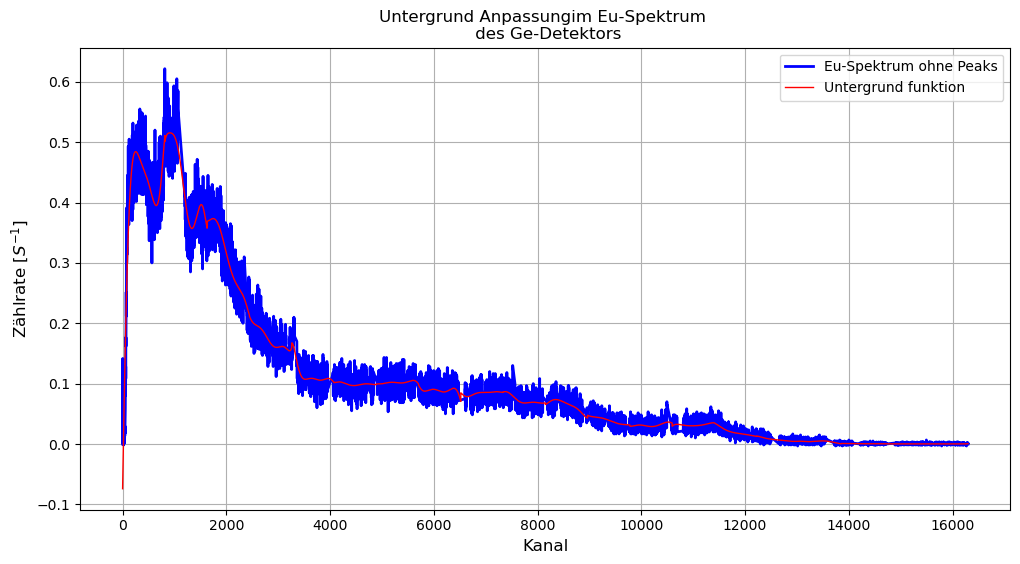

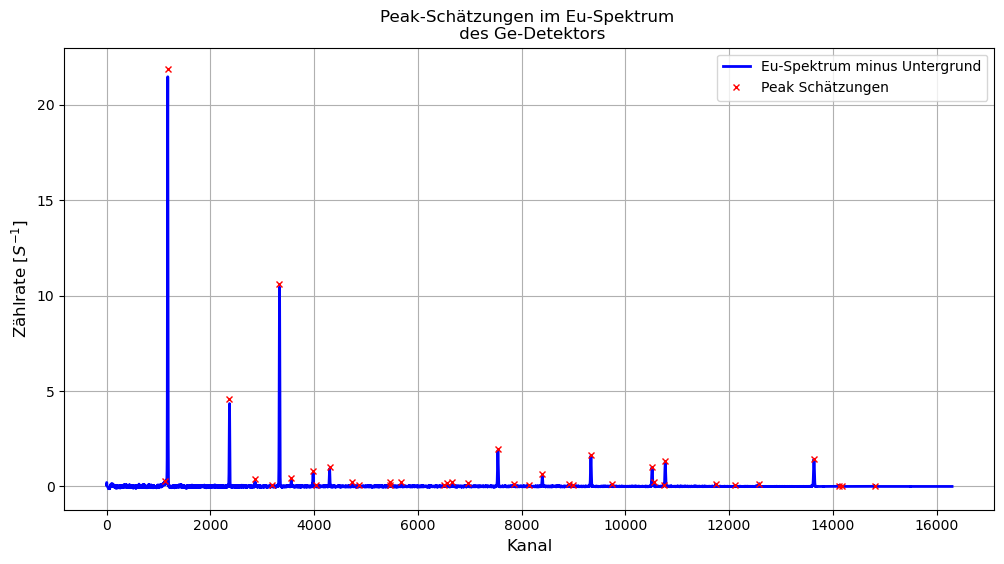

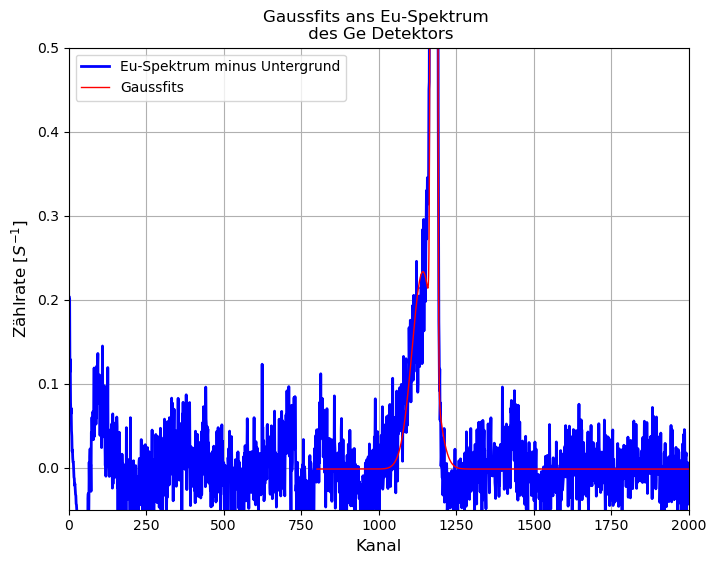

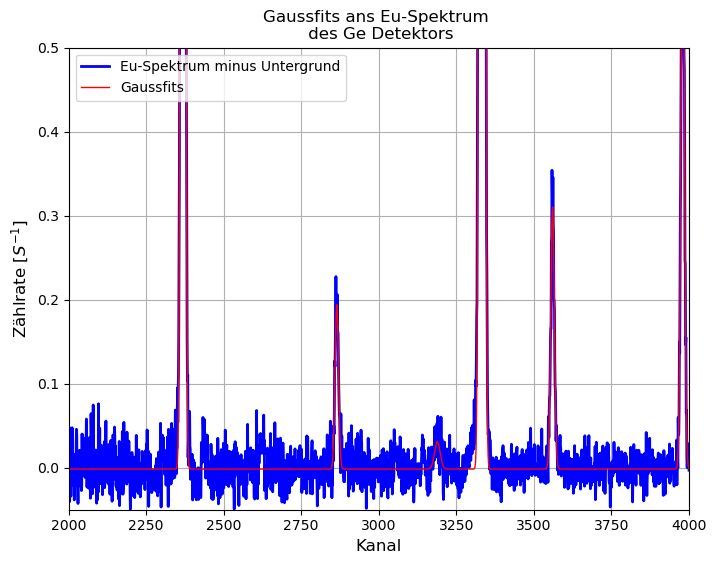

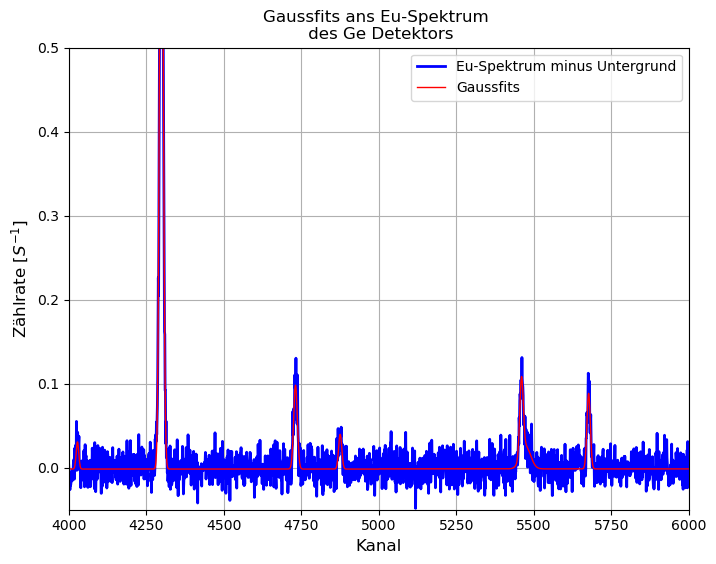

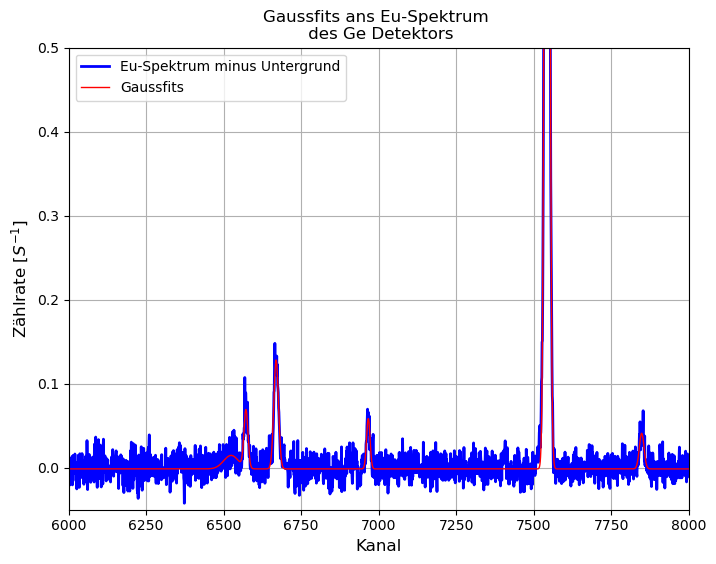

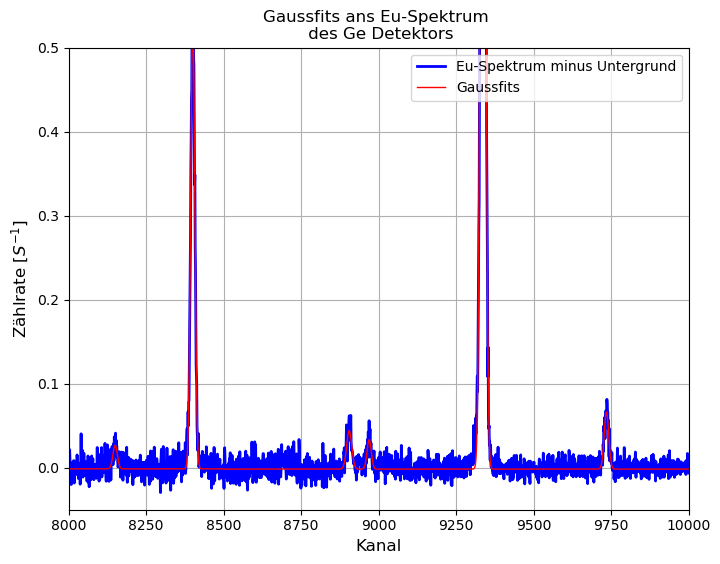

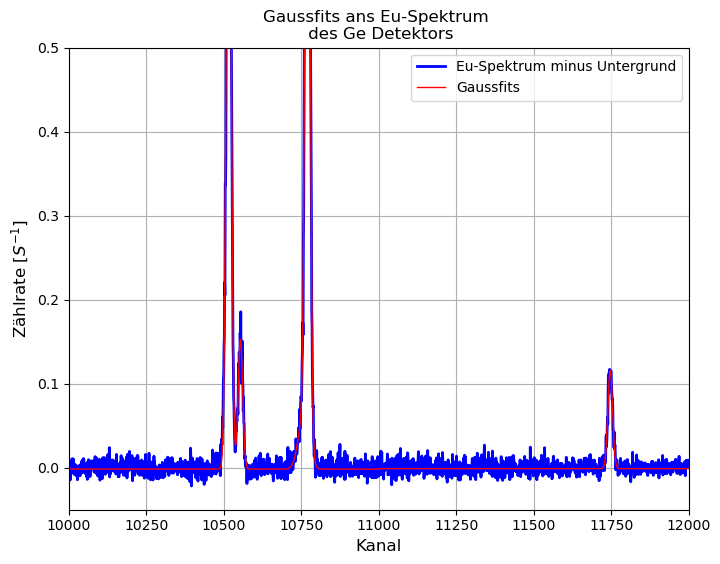

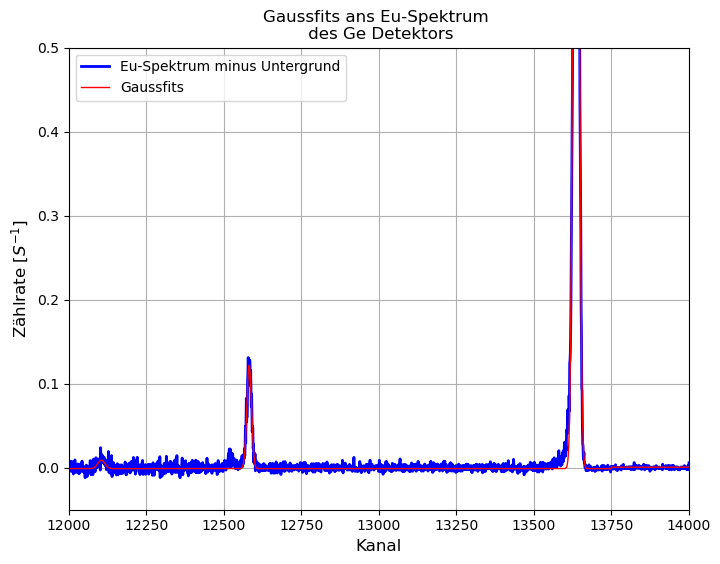

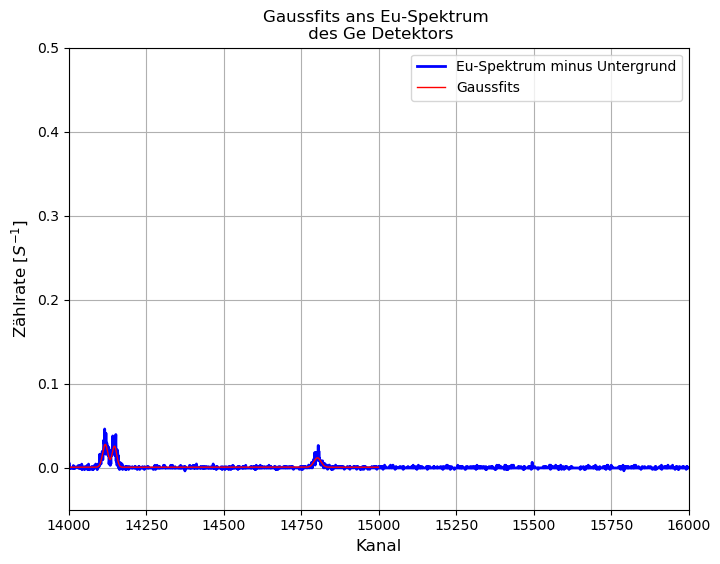

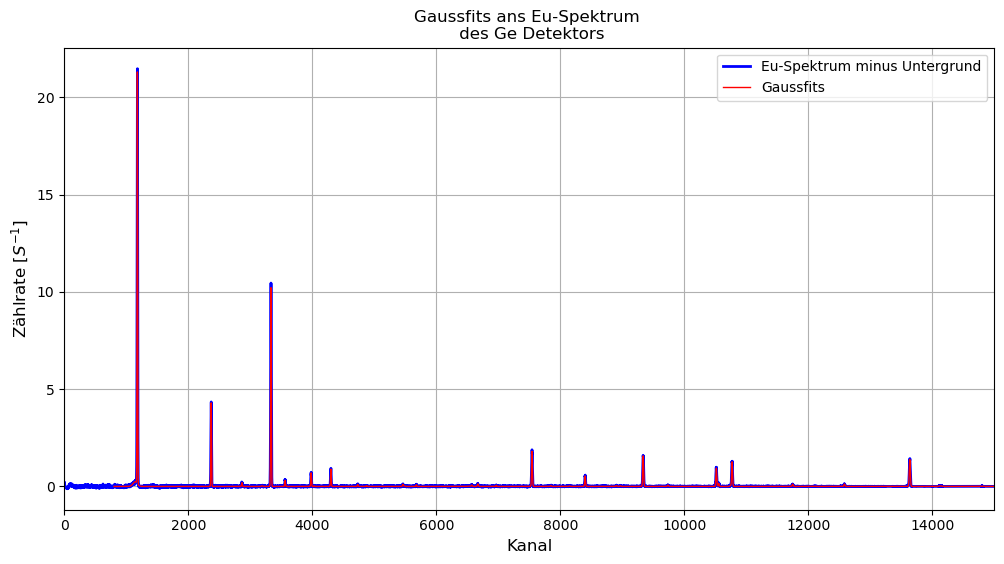

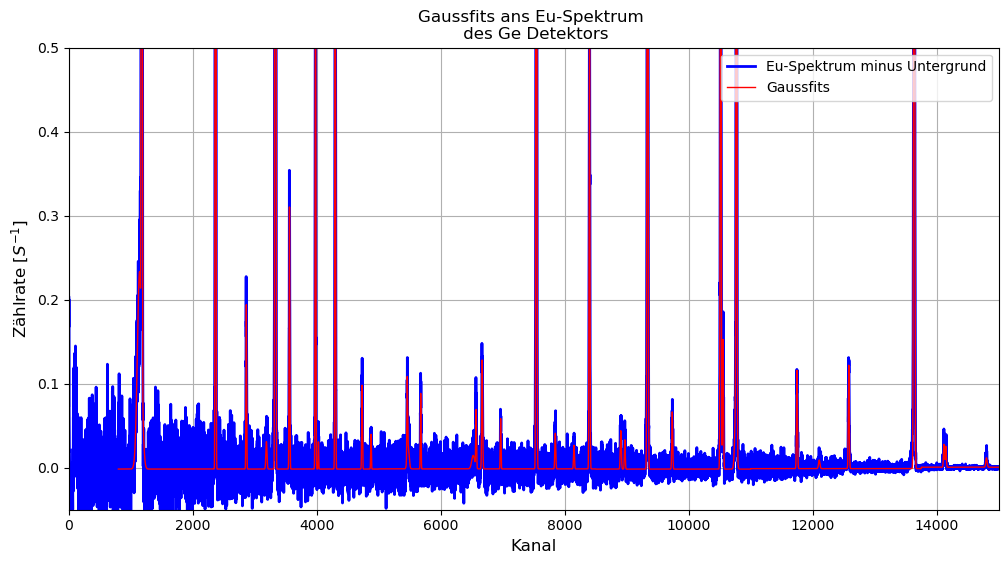

In [16]:
x=xEu[masklast]
y=(yEu[masklast]-yBg[masklast])/600
yer=s((yEuer[masklast]-yBger[masklast])/600)
yerrr=(yEuer[masklast]-yBger[masklast])/600
py=[-0.01 for x in range(27)]
py2=[0.1 for x in range(38)]
# cent=[1179.0, 2369.0, 2862.0, 3333.0, 3559.0, 3982.0, 4300.0, 4733.0, 5462.0, 5676.0, 6568.0, 6665.0, 6964.0, 7543.0, 7853.0, 8402.0, 8907.0, 9335.0, 9736.0, 10515.0, 10555.0, 10770.0, 11745.0, 12579.0, 13638.0, 14116.0,14117.0, 14805.0]
# yranges=[21.891666666666666, 4.575, 0.3933333333333333, 10.598333333333333, 0.46166666666666667, 0.835, 1.03, 0.23, 0.23333333333333334, 0.215, 0.18833333333333332, 0.22666666666666666, 0.155, 1.9583333333333333, 0.13666666666666666, 0.6533333333333333,0.10833333333333334, 1.6366666666666667, 0.11333333333333333, 1.0233333333333334, 0.22166666666666668, 1.3266666666666667, 0.13666666666666666, 0.13833333333333334, 1.4333333333333333, 0.04666666666666667,0.04666666666666667, 0.02666666666666667]
# widths=[10.923773223379612,  12.127571091379195, 13.879032258064626, 12.678768887208207, 12.601785714285597, 13.344343891402787, 13.397280233122729, 15.148809523809177, 18.134502923976584, 11.833333333333371, 13.0, 17.871428571428623, 16.541666666666742, 15.164104638618937, 11.384615384615245, 14.721568627451234, 22.345238095238074, 16.933486622073588, 17.0, 17.333333333333258, 9.861904761904725, 16.94063706563702, 18.57983193277309, 15.0, 40,40,40,40]
cent=[1130,1179.0, 2369.0, 2862.0,3184.61, 3333.0, 3559.0, 3982.0,4027.38, 4300.0, 4733.0,4870.156, 5462.0,5468.439, 5676.0, 6510.116,6568.0, 6665.0, 6964.0, 7543.0, 7853.0,8144.37, 8402.0, 8907.0,8990.77, 9335.0, 9736.0, 10515.0, 10555.0, 10740.5,10770.0, 11745.0,12106.37, 12579.0, 13638.0, 14116.0,14170.0, 14805.0]
yranges=[0.3,21.891666666666666, 4.575, 0.3933333333333333,0.1, 10.598333333333333, 0.46166666666666667, 0.835,0.1 ,1.03, 0.23,0.1, 0.23333333333333334,0.1, 0.215,0.1, 0.18833333333333332, 0.22666666666666666, 0.155, 1.9583333333333333, 0.13666666666666666,0.1, 0.6533333333333333,0.10833333333333334,0.1, 1.6366666666666667, 0.11333333333333333, 1.0233333333333334, 0.22166666666666668,0.1, 1.3266666666666667, 0.13666666666666666,0.1, 0.13833333333333334, 1.4333333333333333, 0.04666666666666667,0.04666666666666667, 0.02666666666666667]
widths=[30,10.923773223379612,  12.127571091379195, 13.879032258064626,13.879032258064626, 12.678768887208207, 12.601785714285597, 13.344343891402787,13.397280233122729, 13.397280233122729, 15.148809523809177, 18.134502923976584, 11.833333333333371, 13.0,13.0, 17.871428571428623,16.541666666666742, 16.541666666666742, 15.164104638618937, 11.384615384615245, 14.721568627451234, 22.345238095238074,14.721568627451234, 16.933486622073588, 17.0,17.0, 17.333333333333258, 9.861904761904725,16.0, 26.94063706563702, 18.57983193277309,15.0, 15.0, 40,40,20,20,40]
#Plotter([x,cent],[y,yranges],2,colors=['b','r'],styles=['-','x'],markersizes=[0,5],linewidths=[0.5,5],yrange=(0,1))
ranges=[[cent[x]-2*widths[x],cent[x]+2*widths[x]] for x in range(len(cent))]
x2=ga(x)
y2=ga(y)
print(len(cent))
for i in range(len(cent)):#27):
    mask=((x2<ranges[i][0]) | (x2>ranges[i][1]))
    x2=x2[mask]
    y2=y2[mask]
N_Bgsplit=20
Bgoverlap=10
BG,BG2,paramsBG,params_stderrBG,namesBG=BackgroundVernichter(x,x2,y2,N_Bgsplit,Bgoverlap)
Tab(namesBG,paramsBG,params_stderrBG,'Tabeupoly')
print(namesBG)

Plotter([x2,x],[y2,BG],2,colors=['b','r'],styles=['-','-'],labels=['Eu-Spektrum ohne Peaks','Untergrund funktion'],markersizes=[0,0],linewidths=[2,1],figsiz=(12,6),xtitle='Kanal',ytitle='Zählrate [$S^{-1}$]',title='Untergrund Anpassungim Eu-Spektrum \n des Ge-Detektors',name='BGfit')#,yrange=(-0.1,5))
Plotter([x,cent],[y-BG,yranges],2,colors=['b','r'],figsiz=(12,6),labels=['Eu-Spektrum minus Untergrund','Peak Schätzungen'],styles=['-','x'],markersizes=[1,5],linewidths=[2,1],xtitle='Kanal',ytitle='Zählrate [$S^{-1}$]',title='Peak-Schätzungen im Eu-Spektrum \n des Ge-Detektors',name='Peaks')#,yrange=(-0.1,5))
#Plotter([x,cent],[y-BG,py2],2,colors=['b','r'],figsiz=(8,6),styles=['-','x'],markersizes=[1,5],linewidths=[2,1],yrange=(-0.1,1))
do_Gausfits1=1

if ('do_Gausfits1' not in locals()):
    do_Gausfits1=1
    x_s1, signal_use1, gauss_centers1, peak_y1, peak_width1, signal_smooth1 = getSignal(x,y-BG,1,28, 1,[800,15000],signal_thr= None)
    p_s1, out_s1, mod_s1, mod_s_only1 = detailedSignalFit(x_s1, signal_use1,0, cent, widths,20,sigma_min=0,sigma_max=50,amp_min=0,amp_value_guess=50,poly_deg= 0)

#params,params_stderr,namen=get_params(out_s1,-1)
#Tab(['Amplitude','center','sigma','fwhm','heigth'],params,params_stderr,'Tablbl')
#Plotter([x,x_s1],[y-BG,out_s1.best_fit],2,colors=['b','r'],styles=['-','-'],markersizes=[0,0],linewidths=[2,1],yrange=(-0.1,1))
signals=[[800,5000],[5000,8500],[8500,11000],[11000,13750],[13750,15000]]
#N_cent=[8,8,6,6]
N_cent=[12,11,8,4,3]
more=[0,0,0,0,0]
print(len(BG))
print(len(x))
if ('do_Gausfits2' in locals()):
    del do_Gausfits2
if ('do_Gausfits2' not in locals()):
    do_Gausfits2=1
    N=0
    N1=0
    Rfita=[]
    x_sa=[]
    paramsa=[]
    params_stderra=[]
    lister=[1 for x in range(len(N_cent))]
    for i in range(len(N_cent)):
        N=N+N_cent[i]
        cent2=[cent[h] for h in range(N1,N)]
        print(cent2)
        widths2=[widths[h] for h in range(N1,N)]
        N1=N
        p_s,x_s,Rfit,params,params_stderr,result,model,model_gaus,names,gc=Fit_allinone_wocent(x,y-BG,cent2,widths2,y_err=yer,center_var=30,s_range=signals[i],amp_guess=50,polydeg=0,more_gaus=more[i],sigmamin=0,sigmamax=70,ampmin=0)
        Rfita=np.concatenate((Rfita,Rfit))
        x_sa=np.concatenate((x_sa,x_s))
        paramsa=np.concatenate((paramsa,params))
        params_stderra=np.concatenate((params_stderra,params_stderr))
        lister[i]=result
        print(params_stderr)
        print(result.fit_report(min_correl=0.5))

for i in range(8):
    Plotter([x,x_sa],[y-BG,Rfita],2,colors=['b','r'],labels=['Eu-Spektrum minus Untergrund','Gaussfits'],styles=['-','-'],close=None,markersizes=[0,0],linewidths=[2,1],figsiz=(8,6),yrange=(-0.05,0.5),xrange=(2000*i,2000*(i+1)),xtitle='Kanal',ytitle='Zählrate [$S^{-1}$]',title='Gaussfits ans Eu-Spektrum \n des Ge Detektors',name='Eufitsmany'+str(i))

Plotter([x,x_sa],[y-BG,Rfita],2,colors=['b','r'],styles=['-','-'],close=None,markersizes=[0,0],linewidths=[2,1],xrange=(0,15000),labels=['Eu-Spektrum minus Untergrund','Gaussfits'],figsiz=(12,6),xtitle='Kanal',ytitle='Zählrate [$S^{-1}$]',title='Gaussfits ans Eu-Spektrum \n des Ge Detektors',name='Eufitsg')
Plotter([x,x_sa],[y-BG,Rfita],2,colors=['b','r'],styles=['-','-'],labels=['Eu-Spektrum minus Untergrund','Gaussfits'],close=None,markersizes=[0,0],linewidths=[2,1],yrange=(-0.05,0.5),xrange=(0,15000),figsiz=(12,6),xtitle='Kanal',ytitle='Zählrate [$S^{-1}$]',title='Gaussfits ans Eu-Spektrum \n des Ge Detektors',name='Eufitsk')
#Plotter([x,x],[y-BG,yer],2,colors=['b','r'],styles=['-','-'],markersizes=[0,0],linewidths=[0.5,0.5],close=None,yrange=(-0.05,0.5),name='Gauskurvenmit einemstreich.png')
#Plotter([x],[y-BG],1,styles=['-','-'],colors=['b','g'],errors=[x,y-BG,np.zeros(shape=(len(x))),yer],yrange=(-0.1,1))
#print(lister[0].fit_report(min_correl=0.5))
print(type(lister[1]))
centers_eu=[paramsa[1+5*i] for i in range(int(len(paramsa)/5))]
centers_euer=[params_stderra[1+5*i] for i in range(int(len(paramsa)/5))]
amp_eu=[paramsa[0+5*i] for i in range(int(len(paramsa)/5))]
amp_euer=[params_stderra[0+5*i] for i in range(int(len(paramsa)/5))]
fwhm_eu=[paramsa[3+5*i] for i in range(int(len(paramsa)/5))]
fwhm_euer=[params_stderra[3+5*i] for i in range(int(len(paramsa)/5))]
center_ripper=[0,36]
ceu=ripfromlist(centers_eu,center_ripper)
ceuer=ripfromlist(centers_euer,center_ripper)
fwhm_eu=ripfromlist(fwhm_eu,center_ripper)
fwhm_euer=ripfromlist(fwhm_euer,center_ripper)
fwhm=un.uarray(fwhm_eu,fwhm_euer)
amp_eu=ripfromlist(amp_eu,center_ripper)
amp_euer=ripfromlist(amp_euer,center_ripper)
amp=un.uarray(amp_eu,amp_euer)
print(fwhm)
#print(amp_eu)
Tab(namen_gaus,paramsa,params_stderra,'TabgausEu')

[[Model]]
    Model(expf)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 1700
    # variables        = 3
    chi-square         = 1873.05339
    reduced chi-square = 1.10374390
    Akaike info crit   = 170.800851
    Bayesian info crit = 187.116002
    R-squared          = 0.90534062
[[Variables]]
    a:  0.04210524 +/- 9.4843e-04 (2.25%) (init = 0.00436)
    b:  17974.8324 +/- 4224.96110 (23.50%) (init = 17080)
    c: -0.00242874 +/- 4.9758e-05 (2.05%) (init = -0.00246)
[[Correlations]] (unreported correlations are < 0.500)
    C(b, c) = -0.9992
    C(a, c) = -0.8333
    C(a, b) = +0.8193
11400
11400
11400
[[Model]]
    (Model(polynomial, prefix='p1_') + Model(gaussian, prefix='g0_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 146
    # data points      = 3799
    # variables        = 9
    chi-square         = 3882.08758
    reduced chi-square = 1.02429751
    Akaike info crit   = 100.192015
 

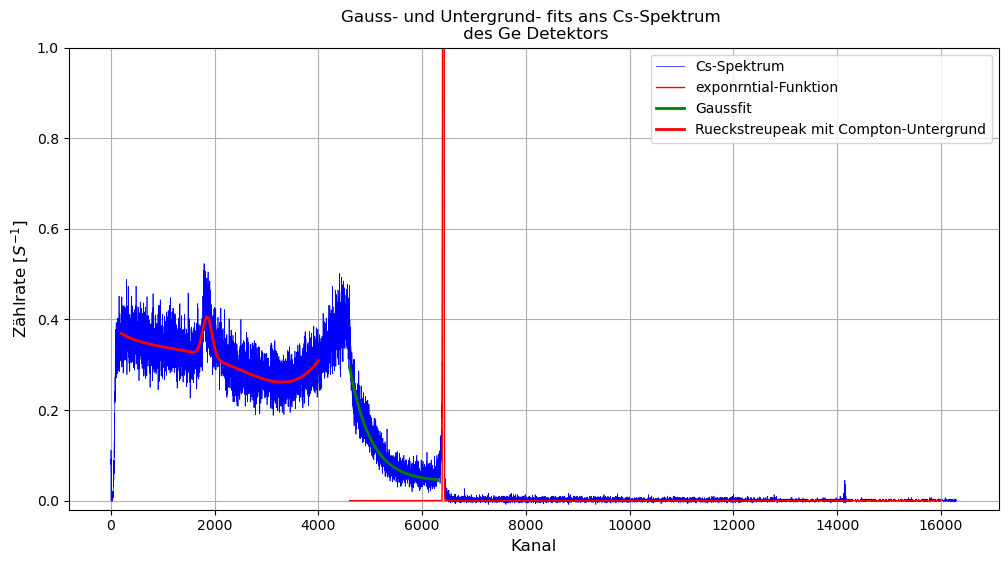

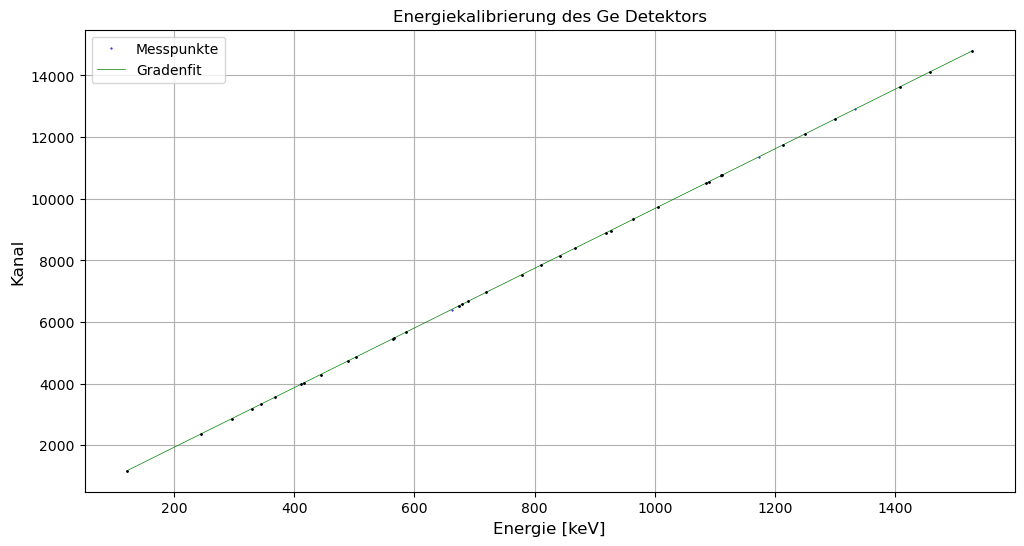

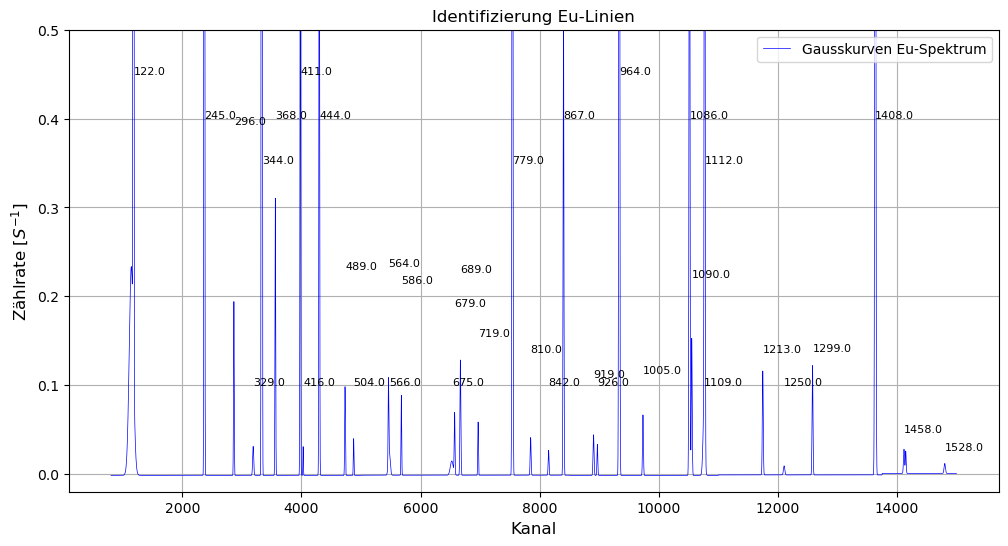

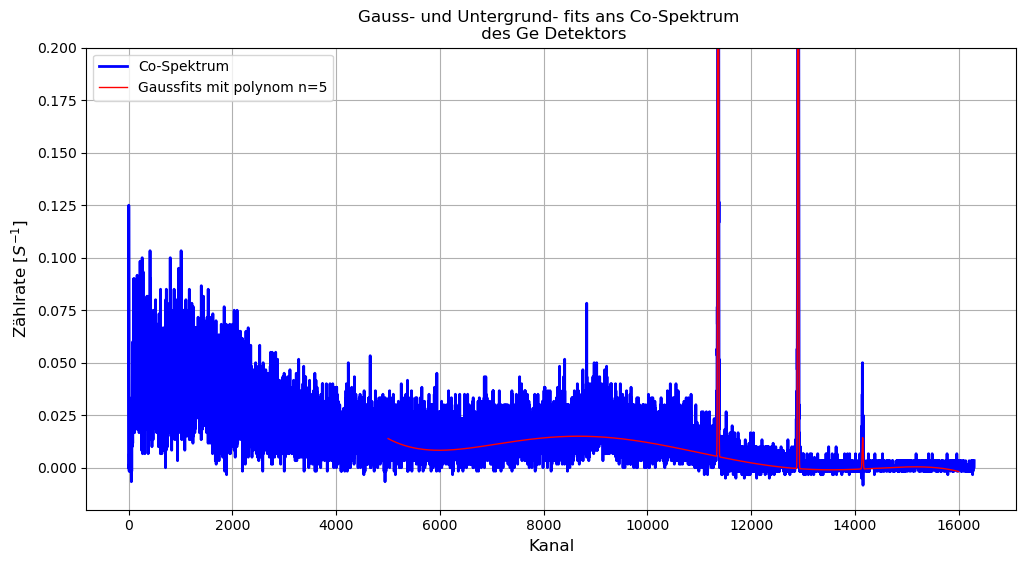

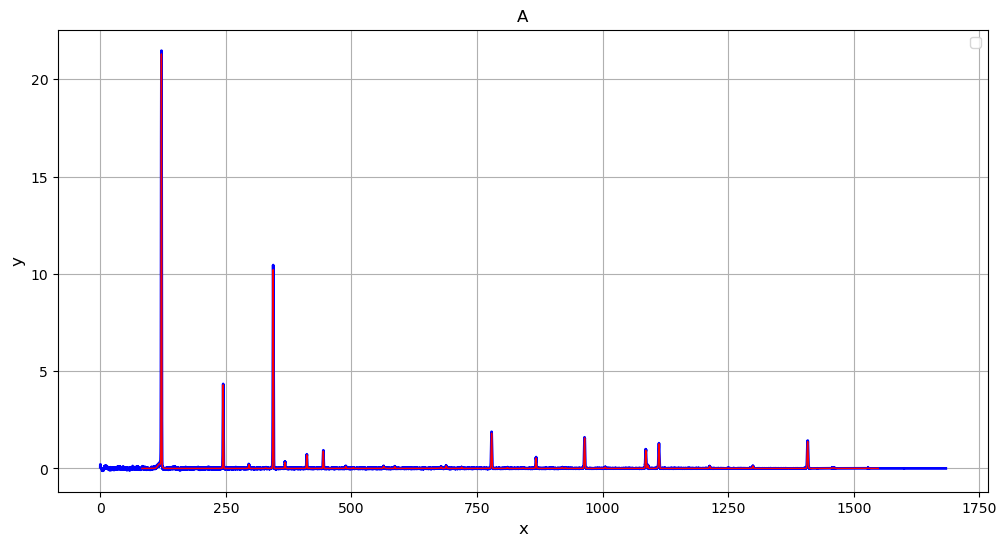

In [14]:
# if ('do_Gausfits2' in locals()):
#     del do_Gausfits2
E_list1=[661.7,1173.2,1332.5]
#E_list_Eu=[121.78,244.697,295.939,344.278,367.789,411.117,443.961,488.679,563.986,586.265,678.623,688.67,719.346,778.904,810.451,867.380,919.337,964.057,1005.27,1085.837,1089.737,1112.076,1212.948,1299.142,1408.013,1457.643,1528.1]
E_list_Eu=[121.8,244.7,295.9,329.4,344.3,367.8,411.1,416.0,444.0,488.7,503.5,564.0,566.4,586.3,674.6,678.6,688.7,719.3,778.9,810.5,841.6,867.4,919.3,926.3,964.1,1005.3,1085.5,1089.7,1109.2,1112.1,1212.9,1250.0,1299.1,1408.0,1457.6,1528.1]
E_rel=[28.53,7.55,0.44,0.12,26.59,0.86,2.24,0.11,2.83,0.41,0.15,0.49,0.13,0.46,0.14,0.47,0.86,0.25,12.93,0.32,0.17,4.23,0.42,0.27,14.51,0.66,10.11,1.73,0.19,13.67,1.42,0.19,1.63,20.87,0.50,0.28]
def expf(x,a,b,c):
    return b*np.exp(c*x)+a

xbg=xBg[masklast]
ybg=(yBg[masklast])/600
Plotter([xbg],[ybg],1,colors=['b'],close=1,linewidths=[.5],figsiz=(6,6),labels=['Messdaten'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Untergrundspektrum am HPGe-Detektor',name='GeBG')
xcsraw=xCs[masklast]
ycsraw=n((yCser[masklast]*2)/600)
xcoraw=xCo[masklast]
ycoraw=n((yCoer[masklast])*2/600)
xeuraw=xEu[masklast]
yeuraw=(yEu[masklast])/600
xuraw=xu
yuraw=n(yuer)/72000
xubgraw=xuBg
yubgraw=yuBg/72000
Plotter([xcsraw],[ycsraw],1,colors=['b'],close=1,linewidths=[.5],figsiz=(6,6),labels=['Messdaten'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Cs-Spektrum am HPGe-Detektor',name='GeCs')
Plotter([xcoraw],[ycoraw],1,colors=['b'],close=1,linewidths=[.5],figsiz=(6,6),labels=['Messdaten'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Co-Spektrum am HPGe-Detektor',name='GeCo')
Plotter([xeuraw],[yeuraw],1,colors=['b'],close=1,linewidths=[.5],figsiz=(6,6),labels=['Messdaten'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Eu-Spektrum am HPGe-Detektor',name='GeEu')
Plotter([xuraw],[yuraw],1,colors=['b'],close=1,linewidths=[.5],figsiz=(6,6),labels=['Messdaten'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Bodenproben Langzeitmessung ',name='GeBGL')
Plotter([xubgraw],[yubgraw],1,colors=['b'],close=1,linewidths=[.5],figsiz=(6,6),labels=['Messdaten'],xtitle='Kanal',ytitle='Zählrate [1/s]',title='Untergrundspektrum Langzeitmessung',name='GeL')



x1=xCs[masklast]
y1=n((yCser[masklast]*2-yBger[masklast])/600)
y1er=s((yCser[masklast]*2-yBger[masklast])/600)
YCS=(yCser[masklast]*2-yBger[masklast])/600
maskCsexp=(((x1>4600) & (x1<=6300)))
maskcsg1=((x1>4600) & (x1<=6300))
maskcsg2=((x1>6300)&(x1<=16000))
expcs,p1cs,other=Lmfiter(x1[maskCsexp],y1[maskCsexp],[4.36e-3,1.708e4,-2.46e-3],expf,dont_plot=1,dy=y1er[maskCsexp],more_points=x1[maskCsexp])
# | ((x1>=6600) & (x1<=16000)))
Tab(other[2],other[0],other[1],'TabCsexp')
x2=xCo[masklast]
y2=n(((yCoer[masklast])*2-yBger[masklast])/600)
y2er=s(((yCoer[masklast])*2-yBger[masklast])/600)
YCO=((yCoer[masklast])*2-yBger[masklast])/600
rukCs,rukparam_Cs,l=Fit_allinone(x1,y1,1,y_err=y1er,width=3,center_var=50,s_range=[200,4000],amp_guess=50,polydeg=5,sigmamax=200,return_in_lists=1)
XXX1=np.concatenate((x1[maskcsg1],x1[maskcsg2]))
YYY1=np.concatenate((y1[maskcsg1]-expcs[1],y1[maskcsg2]))
YYYer1=np.concatenate((y1er[maskcsg1],y1er[maskcsg2]))
print(len(XXX1))
print(len(YYY1))
print(len(YYYer1))
Tab(namen_gaus,rukparam_Cs[2],rukparam_Cs[3],'TabCsruk')
print(rukparam_Cs[4].fit_report(min_correl=0.5))
fit_Cs,param_Cs,l=Fit_allinone(XXX1,YYY1,1,y_err=YYYer1,width=3,center_var=50,s_range=[4600,16000],amp_guess=50,polydeg=None,sigmamax=50,return_in_lists=1)

Tab(namen_gaus,param_Cs[2],param_Cs[3],'TabCsgaus')
print(param_Cs[4].fit_report(min_correl=0.5))
Plotter([x1,fit_Cs[0],expcs[0],rukCs[0]],[y1,fit_Cs[1],expcs[1],rukCs[1]],4,colors=['b','r','g','r'],linewidths=[0.5,1,2,2],close=None,yrange=(-0.02,1),labels=['Cs-Spektrum','exponrntial-Funktion','Gaussfit','Rueckstreupeak mit Compton-Untergrund'],figsiz=(12,6),xtitle='Kanal',ytitle='Zählrate [$S^{-1}$]',title='Gauss- und Untergrund- fits ans Cs-Spektrum \n des Ge Detektors',name='Csfits')#,xrange=(4500,6300))
ampcs=un.uarray(param_Cs[2][0],param_Cs[3][0])
rukampcs=un.uarray(rukparam_Cs[2][0],rukparam_Cs[3][0])
sumcs=sum(YCS)-rukampcs
peakttcs=ampcs/sumcs

# maskCoexp=(((x2>=4600) & (x2<=6300)) | ((x2>=6600) & (x2<=16000)))
# maskcog=((x2>4600)&(x2<=16000))
# expco,p1co,other=Lmfiter(x2[maskCsexp],y2[maskCsexp],[4.36e-3,1.708e4,-2.46e-3],expf,dont_plot=1,dy=y2er[maskCsexp],more_points=np.linspace(4600,16000,num=16000-4600))
# x2=xCo[masklast]
# y2=n(((yCoer[masklast])*2-yBger[masklast])/600)
# y2er=s(((yCoer[masklast])*2-yBger[masklast])/600)
# rukCs,rukparam_Cs,l=Fit_allinone(x1,y1,1,y_err=y1er,width=3,center_var=50,s_range=[200,4000],amp_guess=50,polydeg=5,sigmamax=200,return_in_lists=1)
# print(rukparam_Cs[4].fit_report(min_correl=0.5))

fit_Co,param_Co,l=Fit_allinone(x2,y2,3,y_err=y2er,width=3,center_var=50,s_range=[5000,16000],more_gaus=0,amp_guess=50,polydeg=5,sigmamax=50,return_in_lists=1)

Tab(namen_gaus,param_Co[2],param_Co[3],'TabCogaus')
print(param_Co[4].fit_report(min_correl=0.5))
centers_CsCo=[param_Cs[0][0][1],param_Co[0][0][1],param_Co[0][1][1]]
centers_CsCoer=[param_Cs[1][0][1],param_Co[1][0][1],param_Co[1][1][1]]
amps_Co1=un.uarray(param_Co[0][0][0],param_Co[1][0][0])
amps_Co2=un.uarray(param_Co[0][1][0],param_Co[1][1][0])
ampco=amps_Co1+amps_Co2
otherpeak=un.uarray(param_Co[0][2][0],param_Co[1][2][0])
sumco=sum(YCO)-otherpeak
pttco=ampco/sumco
ceu1=np.concatenate((ceu,centers_CsCo))
ceu1er=np.concatenate((ceuer,centers_CsCoer))
E=np.concatenate((E_list_Eu,E_list1))
fit,para,o=Lmfiter(E,ceu1,[1,1],E_kal,dy=ceu1er,dont_plot=1)

print(len(ceu))
print(len(E_list_Eu))
Plotter([E,fit[0]],[ceu1,fit[1]],2,styles=['.','-'],colors=['b','g'],close=None,errors=[E_list_Eu,ceu, np.zeros(shape=(len(E_list_Eu))),ceuer],labels=['Messpunkte','Gradenfit'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Kanal',title='Energiekalibrierung des Ge Detektors',name='Ekalge')#,xrange=(4500,6300))
Tab2(['Energien [$\si{\keV}$]','Kanal'],[E,ceu1],[[],ceu1er],'TabEkal')
peaks_y=[]
upper_y=0.5
i=0
for yr in yranges:
    if (yr*1.1 >= upper_y):
        peaks_y.append(upper_y*(0.8+0.1*np.cos(np.pi/2*i)))
        i=i+1
    else:
        peaks_y.append(yr)
    
peaks_y=ripfromlist(peaks_y,center_ripper)
fit_CoCs=Gradenfit(E_list1,centers_CsCo)
fit2=Fit_smooth(centers_CsCo,E_list1,centers_eu,[0.1,0],E_kal,centers_CsCoer)
#print(fit2)
Plotter([x_sa],[Rfita],1,colors=['b','r'],styles=['-','-'],text=[E_list_Eu,ceu,peaks_y],close=None,yrange=(-0.02,upper_y),markersizes=[0,0],linewidths=[0.5,0.5],labels=['Gausskurven Eu-Spektrum','exponrntial-Funktion','Gaussfit','Rueckstreupeak mit Compton-Untergrund'],figsiz=(12,6),xtitle='Kanal',ytitle='Zählrate [$S^{-1}$]',title='Identifizierung Eu-Linien',name='Euiden')#,xrange=(4500,6300))
#Plotter([x_sa],[Rfita],1,colors=['b','r'],styles=['-','-'],close=1,text=[fit2,centers_eu,peaks_y],yrange=(0,upper_y),markersizes=[0,0],linewidths=[0.5,0.5],name='Gauskurvenmit einemstreich.png')
#Plotter([centers_CsCo,centers_eu],[E_list1,fit2],2,styles=['x','-'],close=None,markersizes=[5,0],colors=['b','r'])

Plotter([x2,fit_Co[0]],[y2,fit_Co[1]],2,colors=['b','r'],close=None,yrange=(-0.02,0.2),linewidths=[2,1],labels=['Co-Spektrum','Gaussfits mit polynom n=5'],figsiz=(12,6),xtitle='Kanal',ytitle='Zählrate [$S^{-1}$]',title='Gauss- und Untergrund- fits ans Co-Spektrum \n des Ge Detektors',name='C0fits')#,xrange=(4500,6300)))
yeet=[[1,1,1],[2,2,2]]
if yeet:
    print(yeet)
def Ek(x):
    m=uf(9.68641846,3.26943356e-05)
    b=uf(1.6860378,1.51818049e-02)
    y=(x)/m
    y2=(x+b)/m
    return y,y2
Plotter([n(Ek(x)[1]),n(Ek(x_sa)[1])],[y-BG,Rfita],2,colors=['b','r'],styles=['-','-'],close=None,markersizes=[0,0],linewidths=[2,1])
print('ptt-cs:'+ str(peakttcs))
print('ptt-co:'+ str(pttco))

T=13.516*365*24*60*60
time=un.uarray(1326,1)
Inti=709*1000*exp(-np.log(2)*time*24*60*60/T)
abstand=un.uarray(8,0.5)
Ndet=Inti*5.57**2/(16*abstand**2)
#print('Intensität Europium in Bq: '+ str(Inti))
T=30.17*365*24*60*60
Intics=405*1000*exp(-np.log(2)*time*24*60*60/T)
Ndet=Intics*5.57**2/(16*abstand**2)
Effics=ampcs/Ndet
T=5.275*365*24*60*60
Intico=67*1000*exp(-np.log(2)*time*24*60*60/T)
Ndetco=Intico*5.57**2/(16*abstand**2)
print('Intensität Caesium in Bq: '+ str(Intico))
print('Na-Detektoreffizienz: '+str(Effics))

[[Model]]
    Model(Effizienz)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 30
    # variables        = 5
    chi-square         = 102.724222
    reduced chi-square = 4.10896890
    Akaike info crit   = 46.9255169
    Bayesian info crit = 53.9315038
    R-squared          = 0.97566048
[[Variables]]
    P1: -22769.4702 +/- 8671.24273 (38.08%) (init = -58112.08)
    P2:  14149.3097 +/- 5827.56503 (41.19%) (init = 38224.57)
    P3: -3254.45487 +/- 1457.05842 (44.77%) (init = -9360.12)
    P4:  331.308755 +/- 160.714231 (48.51%) (init = 1014.739)
    P5: -12.5902631 +/- 6.60159032 (52.43%) (init = -41.0853)
[[Correlations]] (unreported correlations are < 0.500)
    C(P1, P2) = -0.9998
    C(P2, P3) = -0.9998
    C(P3, P4) = -0.9998
    C(P4, P5) = -0.9998
    C(P1, P3) = +0.9993
    C(P2, P4) = +0.9993
    C(P3, P5) = +0.9992
    C(P1, P4) = -0.9984
    C(P2, P5) = -0.9983
    C(P1, P5) = +0.9971
Durch die Anpassung bestimmte Para

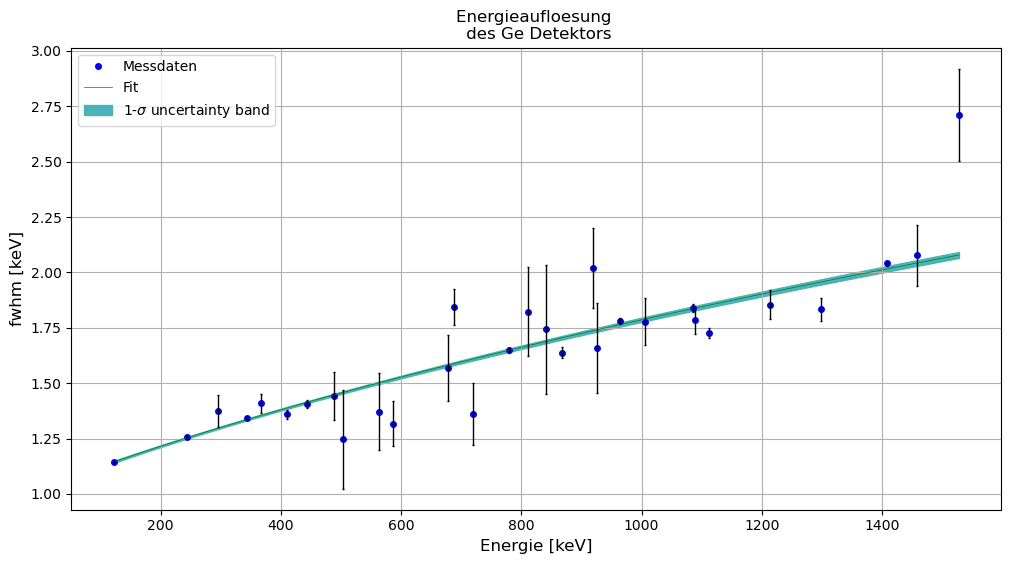

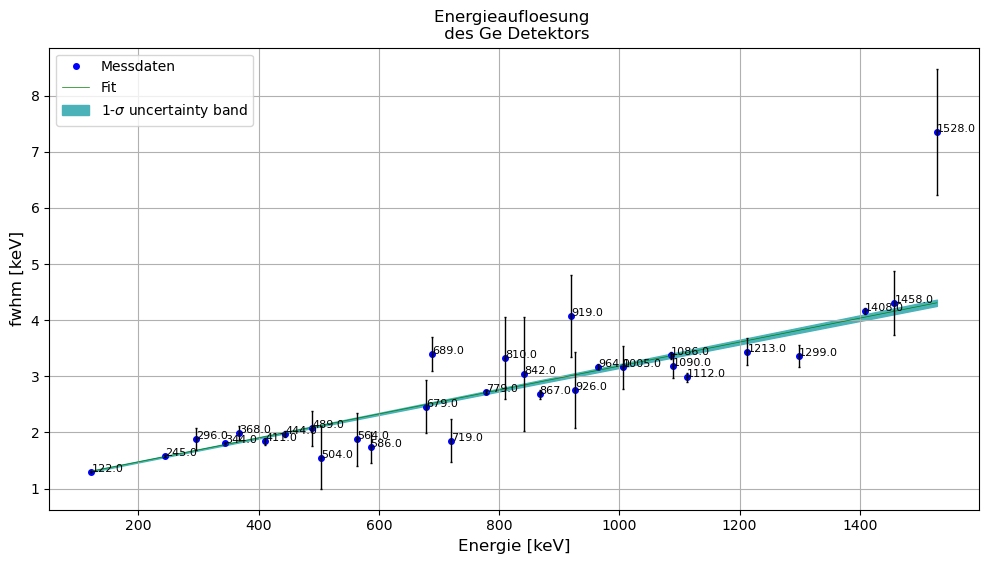

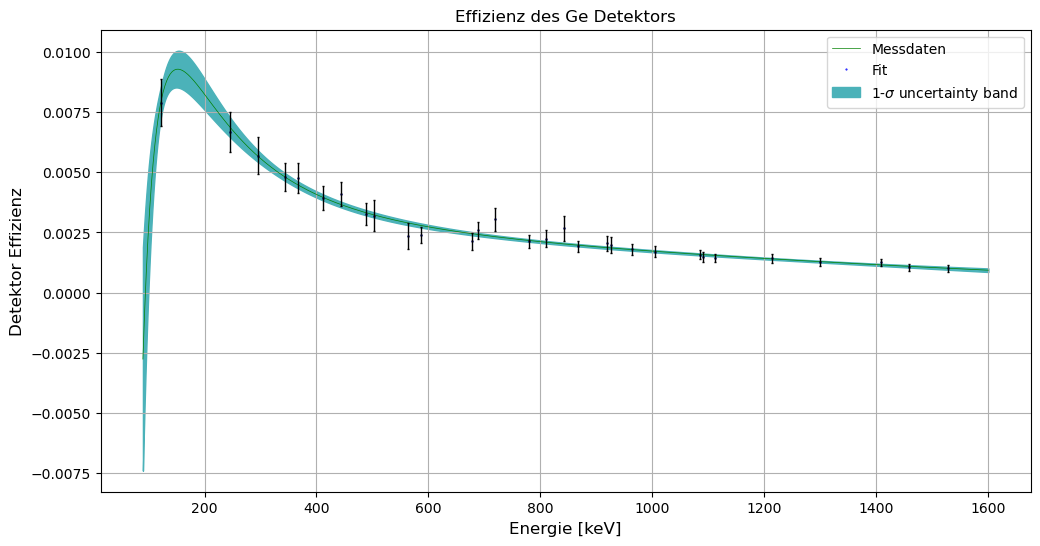

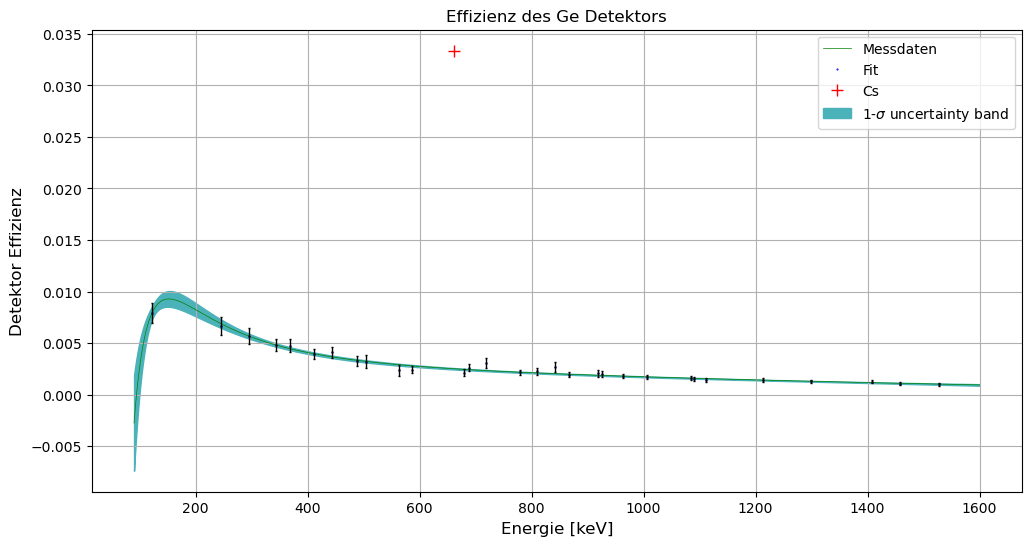

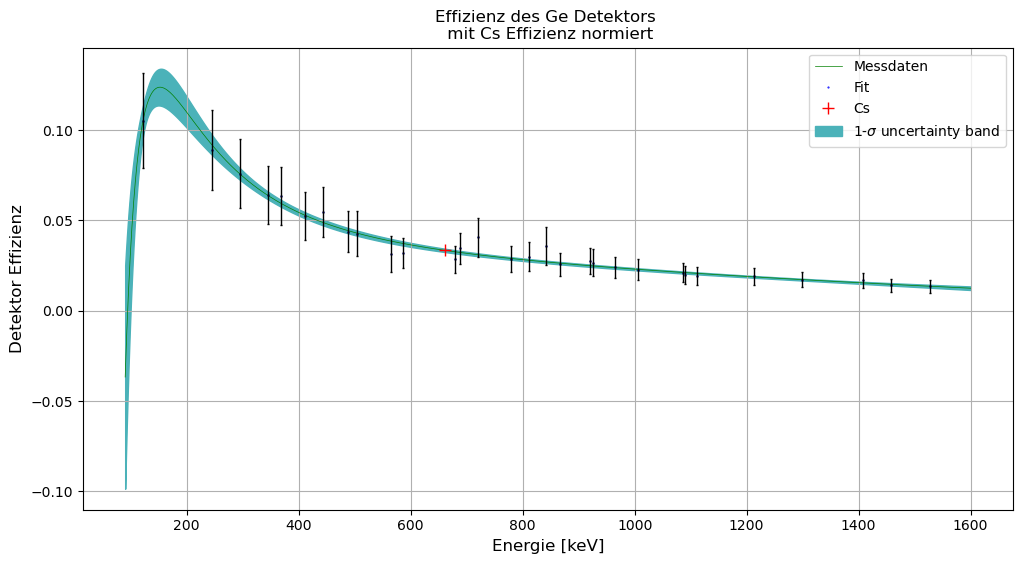

In [13]:
fwhminE,a=Ek(fwhm)
#print(fwhminE)
ampinE,a=Ek(amp)
ripper2=[3,7,12,14,28,31]
# ripper2=[]
ampinE=un.uarray(ripfromlist(n(ampinE),ripper2),ripfromlist(s(ampinE),ripper2))
rel=un.uarray(ripfromlist(E_rel,ripper2),np.zeros(shape=(len(ripfromlist(E_rel,ripper2)))))
fakt=rel[0]/ampinE[0]
eff=ampinE/(rel)*fakt
eff=handle0er(eff)
E_list_Eu1=ripfromlist(E_list_Eu,ripper2)
mp=np.linspace(90,1600,num=1000)
rfit,result,params=Lmfiter(np.array(E_list_Eu1),n(eff),[-58112.0828,38224.5740,-9360.12013,1014.73891,-41.0852979],Effizienz,dy=s(eff),dont_plot=1,no_fitreport=None,more_points=mp)

x_smooth=np.linspace(start=0,stop=1600,num=1600)
fit=Fit_smooth2(E_list_Eu1,n(eff),x_smooth,[1,1,1,1,1],Effizienz)
#Plotter([x_smooth,E_list_Eu1],[fit,n(eff)],2,styles=['-','x'],colors=['g','b'],markersizes=[0,8],yrange=(0,1.2),errors=[E_list_Eu1,n(eff),np.zeros(shape=(len(eff))),s(eff)])
def Eres(x,m,b):
    return np.sqrt((m**2*x+b**2))
fwhminE=un.uarray(ripfromlist(n(fwhminE),ripper2),ripfromlist(s(fwhminE),ripper2))
fit,result,para=Lmfiter(np.array(E_list_Eu1),n(fwhminE),[1,1],Eres,dy=s(fwhminE),dont_plot=1)
Tab(para[2],para[0],para[1],'Tabauflkg')
Plotter([E_list_Eu1,fit[0]],[n(fwhminE),fit[1]],2,close=None,ucband=[fit,[1]],styles=['.','-'],markersizes=[8],colors=['b','g'],errors=[E_list_Eu1,n(fwhminE),np.zeros(shape=(len(E_list_Eu1))),s(fwhminE)],labels=['Messdaten','Fit'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='fwhm [keV]',title='Energieaufloesung \n des Ge Detektors',name='auflkg')#,xrange=(4500,6300))))
fwhminE2=fwhminE**2
#,text=[E_list_Eu1,E_list_Eu1,n(fwhminE)]
fit,result,para=Lmfiter(np.array(E_list_Eu1),n(fwhminE2),[1,1],E_kal,dy=s(fwhminE2),dont_plot=1)#(E_list_Eu1,n(fwhminE),s(fwhminE))
Tab(para[2],para[0],para[1],'Tabauflg')
Plotter([E_list_Eu1,fit[0]],[n(fwhminE2),fit[1]],2,text=[E_list_Eu1,E_list_Eu1,n(fwhminE2)],close=None,ucband=[fit,[1]],styles=['.','-'],markersizes=[8],colors=['b','g'],errors=[E_list_Eu1,n(fwhminE2),np.zeros(shape=(len(E_list_Eu1))),s(fwhminE2)],labels=['Messdaten','Fit'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='fwhm [keV]',title='Energieaufloesung \n des Ge Detektors',name='aufleg')#,xrange=(4500,6300)))))
print(np.sum(y))
print(sum(yerrr))
T=13.516*365*24*60*60
time=un.uarray(1326,0.001)
Inti=709*1000*exp(-np.log(2)*time*24*60*60/T)
Ndet=Inti*5.57**2/(16*abstand**2)
Effi=ampinE/Ndet
eff=Effi/rel*sum(rel)
def expf(x,A,B,C):
    return A+B*np.exp(x*C)
mp=np.linspace(90,1600,num=1000)
rfit,result,params=Lmfiter(np.array(E_list_Eu1),n(eff),[-58112.0828,38224.5740,-9360.12013,1014.73891,-41.0852979],Effizienz,dy=s(eff),dont_plot=1,no_fitreport=None,more_points=mp)
Tab(params[2],params[0],params[1],'TabEff')
dely = result.eval_uncertainty(sigma=1,x=mp)
cs_norm=result.eval(x=np.array(661.7))
cn=Effics/cs_norm
Plotter([mp,E_list_Eu1,[661.7]],[rfit[1],n(eff),n(Effics)],2,ucband=[rfit,[1]],errors=[E_list_Eu1,n(eff),np.zeros(shape=(len(E_list_Eu1))),s(eff)],styles=['-','.','+'],close=None,colors=['g','b','r'],markersizes=[0,1,8],labels=['Messdaten','Fit'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Detektor Effizienz',title='Effizienz des Ge Detektors',name='Eff1')#,xrange=(4500,6300)))))

Plotter([mp,E_list_Eu1,[661.7]],[rfit[1],n(eff),n(Effics)],3,ucband=[rfit,[1]],errors=[E_list_Eu1,n(eff),np.zeros(shape=(len(E_list_Eu1))),s(eff)],styles=['-','.','+'],close=None,colors=['g','b','r'],markersizes=[0,1,8],labels=['Messdaten','Fit','Cs'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Detektor Effizienz',title='Effizienz des Ge Detektors',name='Eff2')#,xrange=(4500,6300))))))

Plotter([mp,E_list_Eu1,[661.7]],[rfit[1]*n(cn),n(eff*cn),n(Effics)],3,ucband=[[rfit[0],rfit[1]*n(cn),rfit[2]*n(cn)],[1]],errors=[E_list_Eu1,n(eff*cn),np.zeros(shape=(len(E_list_Eu1))),s(eff*cn)],styles=['-','.','+'],close=None,colors=['g','b','r'],markersizes=[0,1,8],labels=['Messdaten','Fit','Cs'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Detektor Effizienz',title='Effizienz des Ge Detektors \n mit Cs Effizienz normiert',name='Eff3')#,xrange=(4500,6300)))))
print('Normierungsfaktor CS='+str(cn))
cocor=ampco/(result.eval(x=(1173.23+1332.49)/2)*cn)
Tab2(['Energie [$\si{\keV}$]','fwhm [$\si{\keV}$]','Integral [$s^{-1}$]','rel. Intensität [%]','E','$\epsilon$','$\epsilon \cdot N_{Cs}$'],[E_list_Eu1,n(fwhminE),n(ampinE),n(rel),n(Effi),n(eff),n(eff*cn)],[[],s(fwhminE),s(ampinE),[],s(Effi),s(eff),s(eff*cn)],'Taballesmoegliche')
print('Aktivität Co exp:'+str(cocor/(5.57**2/(16*abstand**2))))
print('Theo Aktivität Co:'+str(Intico))

[4.7136854854964764e-09+/-7.398814641296339e-10
 2.057298888590668e-09+/-5.920121230599444e-10
 2.2842086723215654e-08+/-8.491888746187257e-10
 4.96558855018724e-09+/-7.790977991773409e-10
 0.0007174228382435047+/-5.176855565179249e-05
 0.0004616546140076485+/-5.579459293217145e-05
 0.0014313057025393302+/-7.663262647767297e-05
 0.000515002330621699+/-8.57103211404375e-05
 0.0013699697399103096+/-9.683714767359572e-05
 0.002200073627441208+/-0.00010796264316793095
 0.0010679077781620258+/-0.00012790243930405477
 0.0006455443105317358+/-0.00011306705408680789
 0.0006492364955881459+/-0.00015064602124811212
 0.002033970001907385+/-0.00044756756227164483]
[[Model]]
    (Model(polynomial, prefix='p1_') + (((Model(gaussian, prefix='g0_') + Model(gaussian, prefix='g1_')) + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 154
    # data points      = 1259
    # variables        = 14
    chi-square    

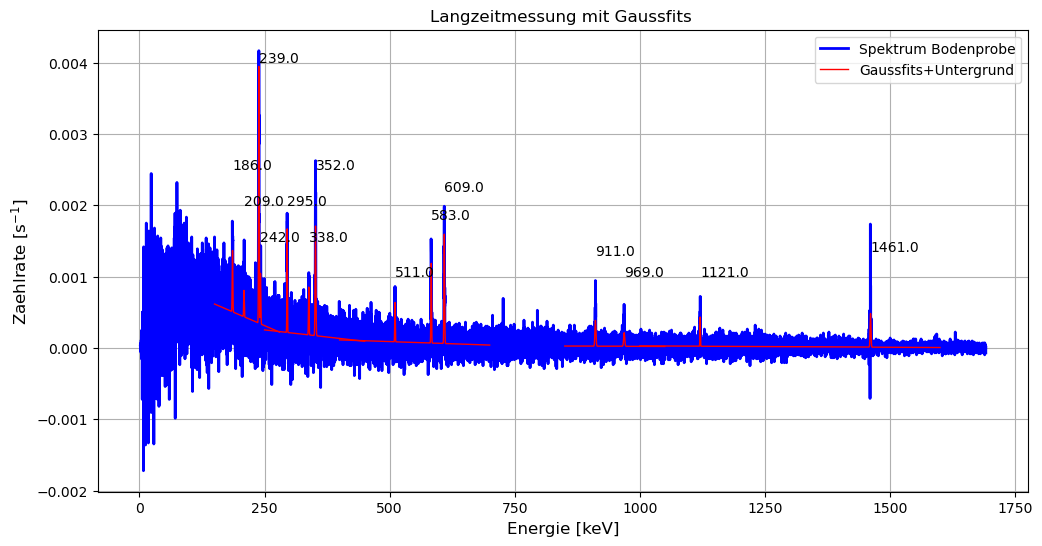

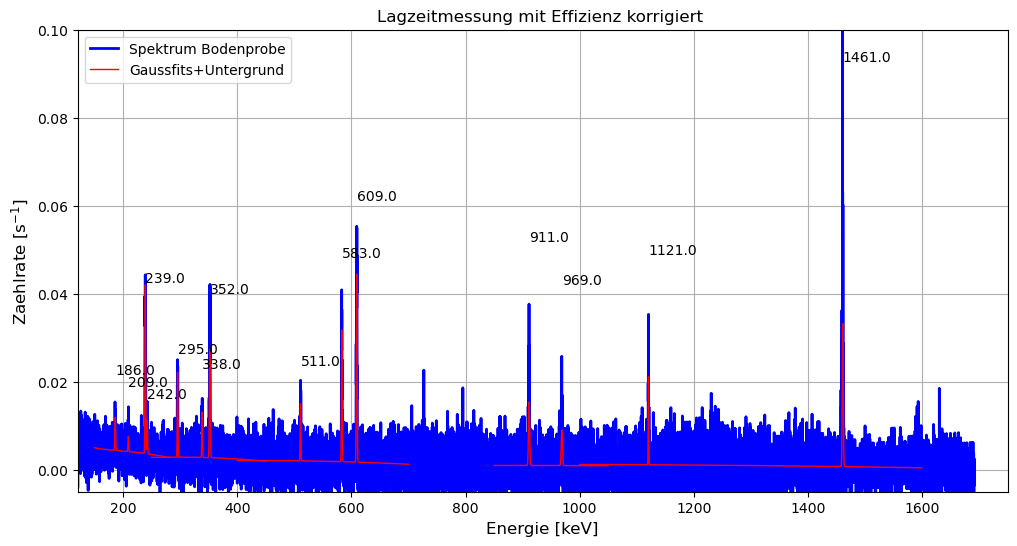

In [40]:

#plt.fill_between(mp, rfit[1]-dely, rfit[1]+dely, color="#ABABAB",label=r'3-$\sigma$ uncertainty band')
X=xu
Y=n(yuer-yuBger)
Yer=s((yuer-yuBger))
a,XE=Ek(X)
yy=n(result.eval(x=n(XE))*cn)
# Y=n(yyy/yy)
# Yer=s(yyy/yy)
# res,para,other=Fit_allinone(n(XE),Y,2,y_err=Yer,s_range=[1000,1600],more_gaus=0,center_var=10,width=4,amp_guess=50,polydeg=1,sigmamax=5,smoothe=1,return_in_lists=1,signal_t=0.5)
# Plotter([n(XE),res[0]],[Y,res[1]],2,colors=['b','r'],styles=['-',''],markersizes=[0,5],linewidths=[2,1],xrange=(1000,1600))
# AA=[6,2,0,2,1,1,0,2,0,1,0,0,1,0]
# print(para[4].fit_report(min_correl=0.5))
# for i in range(8):
#      Plotter([n(XE)],[Y],1,colors=['b','r'],linewidths=[2,1],xrange=(400+200*i,400+200*(i+1)))
#x_s, signal_use, cent, yranges, peak_width, signal_smooth = getSignal(n(XE),Y,1,3,None,[100,300],signal_thr= None)
if not ('mach_nicht' in locals()):
    mach_nicht=1
    res1,para1,other=Fit_allinone(n(XE),Y/72000,4,y_err=Yer/72000,s_range=[150,280],width=1,amp_guess=0.005,polydeg=1,sigmamax=2,return_in_lists=1,minmaxvar=10,edges=20)
    Plotter([n(XE),res1[0]],[Y,res1[1]*72000],2,colors=['b','r'],styles=['-',''],markersizes=[0,5],linewidths=[2,1],xrange=(0,260),labels=['Spektrum Bodenprobe','Gaussfits+Untergrund'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Zaehlrate [s$^{-1}$]',title='Bodenprobe ',name='boden1')#,xrange=(4500,6300))))))
    res2,para2,other=Fit_allinone(n(XE),Y,3,y_err=Yer,s_range=[250,450],more_gaus=0,center_var=10,width=4,amp_guess=50,polydeg=1,sigmamax=1,smoothe=0,return_in_lists=1,signal_t=0.5,minmaxvar=10,edges=20)
    Plotter([n(XE),res2[0]],[Y,res2[1]],2,colors=['b','r'],styles=['-',''],markersizes=[0,5],linewidths=[2,1],xrange=(260,450),labels=['Spektrum Bodenprobe','Gaussfits+Untergrund'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Zaehlrate [s$^{-1}$]',title='Bodenprobe ',name='boden2')#,xrange=(4500,6300)))))))
    res3,para3,other=Fit_allinone(n(XE),Y,3,y_err=Yer,s_range=[400,700],more_gaus=0,center_var=10,width=4,amp_guess=50,polydeg=1,sigmamax=1,smoothe=0,return_in_lists=1,signal_t=0.5,minmaxvar=10,edges=20)
    Plotter([n(XE),res3[0]],[Y,res3[1]],2,colors=['b','r'],styles=['-',''],markersizes=[0,5],linewidths=[2,1],xrange=(450,700),labels=['Spektrum Bodenprobe','Gaussfits+Untergrund'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Zaehlrate [s$^{-1}$]',title='Bodenprobe ',name='boden3')#,xrange=(4500,6300)))))))
    res4,para4,other=Fit_allinone(n(XE),Y,2,y_err=Yer,s_range=[850,1050],more_gaus=0,center_var=10,width=4,amp_guess=50,polydeg=1,sigmamax=2,smoothe=1,return_in_lists=1,signal_t=0.5,minmaxvar=10,edges=20)
    Plotter([n(XE),res4[0]],[Y,res4[1]],2,colors=['b','r'],styles=['-',''],markersizes=[0,5],linewidths=[2,1],xrange=(700,1000),labels=['Spektrum Bodenprobe','Gaussfits+Untergrund'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Zaehlrate [s$^{-1}$]',title='Bodenprobe ',name='boden4')#,xrange=(4500,6300)))))))
    res5,para5,other=Fit_allinone(n(XE),Y,2,y_err=Yer,s_range=[1000,1600],more_gaus=0,center_var=10,width=4,amp_guess=50,polydeg=1,sigmamax=5,smoothe=1,return_in_lists=1,signal_t=0.5,minmaxvar=10,edges=20)
    Plotter([n(XE),res5[0]],[Y,res5[1]],2,colors=['b','r'],styles=['-',''],markersizes=[0,5],linewidths=[2,1],xrange=(1000,1600),labels=['Spektrum Bodenprobe','Gaussfits+Untergrund'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Zaehlrate [s$^{-1}$]',title='Bodenprobe ',name='boden5')#,xrange=(4500,6300)))))))
params=np.concatenate((para1[2],para2[2],para3[2],para4[2],para5[2]))
params_stderr=np.concatenate((para1[3],para2[3],para3[3],para4[3],para5[3]))
centererde=[params[1+i*5] for i in range(int(len(params)/5))]
ph=[0.003-0.0002*x for x in range(int(len(params)/5))]
ph=[0.0025,0.002,0.004,0.0015,0.002,0.0015,0.0025,0.001,0.0018,0.0022,0.0013,0.001,0.001,0.00135]
Plotter([n(XE),res1[0],res2[0],res3[0],res4[0],res5[0]],[Y/(72000),res1[1],res2[1]/(72000),res3[1]/(72000),res4[1]/(72000),res5[1]/(72000)],6,text=[centererde,centererde,ph],colors=['b','r','r','r','r','r'],styles=['-','','','','',''],markersizes=[0,5],linewidths=[2,1,1,1,1,1],labels=['Spektrum Bodenprobe','Gaussfits+Untergrund'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Zaehlrate [s$^{-1}$]',title='Langzeitmessung mit Gaussfits ',name='HodenoE')#,xrange=(4500,6300)))))))
Plotter([n(XE),res1[0],res2[0],res3[0],res4[0],res5[0]],[Y/(72000*n(result.eval(x=n(XE))*cn)),res1[1]/n(result.eval(x=res1[0])*cn),res2[1]/(72000*n(result.eval(x=res2[0])*cn)),res3[1]/(72000*n(result.eval(x=res3[0])*cn)),res4[1]/(72000*n(result.eval(x=res4[0])*cn)),res5[1]/(72000*n(result.eval(x=res5[0])*cn))],6,text=[centererde,centererde,ph/(n(result.eval(x=np.array(centererde))*cn))],xrange=(120,1750),yrange=(-0.005,0.1),colors=['b','r','r','r','r','r'],styles=['-','','','','',''],markersizes=[0,5],linewidths=[2,1,1,1,1,1],labels=['Spektrum Bodenprobe','Gaussfits+Untergrund'],figsiz=(12,6),xtitle='Energie [keV]',ytitle='Zaehlrate [s$^{-1}$]',title='Lagzeitmessung mit Effizienz korrigiert ',name='Hoden')#,xrange=(4500,6300)))))))
all=sum(Y/(result.eval(x=n(XE))*cn))
amp_eu=[params[0+5*i] for i in range(int(len(params)/5))]
amp_euer=[params_stderr[0+5*i] for i in range(int(len(params)/5))]
amp=un.uarray(amp_eu,amp_euer)
verh=amp/(all*(result.eval(x=centererde)*cn))
print(verh)
Tab(['Integral [$s^{-^}$]','\mu [$\si{\keV}$]','\sigma [$\si{\keV}$]','fwhm [$\si{\keV}$]','Hoehe [$s^{-^}$]'],params,params_stderr,'Tabgaussboden')
#Plotter([x],[y],2,colors=['b','r'],styles=['-','x'],markersizes=[0,5],linewidths=[0.5,5],yrange=(0,1))
paranames=[para1[4],para2[4],para3[4],para4[4],para5[4]]
for i in range(5):
    print(paranames[i].fit_report(min_correl=0.5))

In [41]:
#lmfit zeugs:
#modelresult class
#modelresult.eval_components    
#ModelResult.summary()
#ModelResult.eval_uncertainty
#ModelResult.plot
#ModelResult.plot_fit
#ModelResult.plot_residuals
maskexp=((x1>4600) &(x1<5400))
xexp=ga(x1[maskexp])
yexp=ga(y1[maskexp])

